# **PROBLEM STATEMENT AND OBJECTIVE**
* Air travel is increasing now a days also complex problem associated with that is also increasing now a days due tomany attributes. Consequence of flight delay impact on variables such as impacts carrier, Airport and passenger and may result in significant commercial loss or reputation loss to all the stakeholders and thus huge cost on the economy. Thus, problem on flight delay prediction plays a vital role from customer and management and time management perspective and carrier for retention of customer faith but also from Airport point of view for managing the traffic more efficiently to optimise the number of arriving flights by appropriate adjustment of schedules. One of the aspects for the flight delay is the contribution of weather conditions. 
  
* The historical data containing scheduled departure  and arrival times, date, origin, destination and also weather data is available  and the data scientists can predict if delay can happen or not  using the flight data and aviation weather data for a specific flight.


# **IMPORTING NECCESARY PACKAGES**

In [ ]:
# importing libraries
import re
import pandas as pd
import numpy as np

#Import libraries for plotting 
from matplotlib import pyplot as plt
import seaborn as sns

#Train test split
from sklearn.model_selection import train_test_split
# Standerdisation of numeric attributes and dummification of cat features
from sklearn.preprocessing import StandardScaler

# importing performance metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix

# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading train data files
df_path = "/content/drive/MyDrive/predict/Train.csv"
df= pd.read_csv(df_path)

In [ ]:
df.head()
# df.shape

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46


**USER DEFINED STATS FUNCTIONS FOR MANIPULATION**

In [ ]:
# it gives the shape, value_counts and uniqueness level in the data
def count_stats(x):
    dataframe = pd.DataFrame(x)
    
    for col in dataframe.columns:
        print("shape of df ", dataframe.shape)
        print("no_of_rows in df", len(dataframe.index))
#         print(col, "count in", dataframe[col].count())
        print("colname:", col, ",", "their value count in", len(dataframe[col].value_counts()))
#         print(col, "Unique", (dataframe[col].nunique()))
        print("% unique at ", col, (dataframe[col].value_counts().count()/len(dataframe.index))*100,"%")
        print("---------------------------------------")
    

In [ ]:
# This function will check pattrents in the features. If there is any pattrents can be identified 
# and can be removed depending upon the attribute information
def pattern(x):
    pattern_any = dict()
    dataframe = pd.DataFrame(x)
    for col in dataframe.columns:
        for val in (dataframe[col]):
            result = (re.findall(r"[^0-9a-zA-Z]", str(val)))
            if result == None:
                pattern_any[col] = 0
            else:
                pattern_any[col] = result
    return pattern_any

In [ ]:
print("************Train data details ******************")
count_stats(df)

************Train data details ******************
shape of df  (7861, 12)
no_of_rows in df 7861
colname: FlightNumber , their value count in 7861
% unique at  FlightNumber 100.0 %
---------------------------------------
shape of df  (7861, 12)
no_of_rows in df 7861
colname: Year , their value count in 1
% unique at  Year 0.012721027859051012 %
---------------------------------------
shape of df  (7861, 12)
no_of_rows in df 7861
colname: Month , their value count in 6
% unique at  Month 0.07632616715430607 %
---------------------------------------
shape of df  (7861, 12)
no_of_rows in df 7861
colname: DayofMonth , their value count in 31
% unique at  DayofMonth 0.3943518636305814 %
---------------------------------------
shape of df  (7861, 12)
no_of_rows in df 7861
colname: DayOfWeek , their value count in 7
% unique at  DayOfWeek 0.08904719501335707 %
---------------------------------------
shape of df  (7861, 12)
no_of_rows in df 7861
colname: ScheduledDepTime , their value count in 

In [ ]:
pattern(df)

{'FlightNumber': ['_', '_'],
 'Year': [],
 'Month': [],
 'DayofMonth': [],
 'DayOfWeek': [],
 'ScheduledDepTime': [],
 'ScheduledArrTime': [],
 'ScheduledTravelTime': [],
 'Origin': [],
 'Destination': [],
 'Distance': [],
 'ActualArrivalTimeStamp': ['/', '/', ' ', ':']}

##**COMBINING WHETHER DATA**

**READING HOURLY AND HPD DATA**

In [ ]:
hourly_01 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200401hourly.txt")
hourly_03 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200403hourly.txt")
hourly_05 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200405hourly.txt")
hourly_07 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200407hourly.txt")
hourly_09 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200409hourly.txt")
hourly_11 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200411hourly.txt")

In [ ]:
hpd_1 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200401hpd.txt")
hpd_3 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200403hpd.txt")
hpd_5 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200405hpd.txt")
hpd_7 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200407hpd.txt")
hpd_9 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200409hpd.txt")
hpd_11 = pd.read_csv(r"/content/drive/MyDrive/predict/2004/200411hpd.txt")


**CONCATING BASED ON ROWS**

In [ ]:
hourly_records = pd.concat([hourly_01, hourly_03, hourly_05,hourly_07, hourly_09, hourly_11], axis=0)

hpd_records = pd.concat([hpd_1, hpd_3, hpd_5,hpd_7, hpd_9, hpd_11], axis=0)

In [ ]:
hourly_records.shape

(6485177, 12)

In [ ]:
hourly_records.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [ ]:
hpd_records.shape

(7697386, 4)

In [ ]:
hpd_records.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,3034,20040101,10,0.0
1,3035,20040101,10,0.0
2,3039,20040101,10,0.0
3,3040,20040101,10,0.0
4,4128,20040101,10,0.0


 **EDA ON HOURLY AND HPD DATA**


In [ ]:
print("****************hourly_records***********************")
print()
count_stats(hourly_records)
print()
print("***************hpd_records**************************")
print()
count_stats(hpd_records)

****************hourly_records***********************

shape of df  (6485177, 12)
no_of_rows in df 6485177
colname: WeatherStationID , their value count in 1447
% unique at  WeatherStationID 0.02231242107964054 %
---------------------------------------
shape of df  (6485177, 12)
no_of_rows in df 6485177
colname: YearMonthDay , their value count in 157
% unique at  YearMonthDay 0.002420905397030798 %
---------------------------------------
shape of df  (6485177, 12)
no_of_rows in df 6485177
colname: Time , their value count in 1428
% unique at  Time 0.022019445267261017 %
---------------------------------------
shape of df  (6485177, 12)
no_of_rows in df 6485177
colname: SkyConditions , their value count in 247019
% unique at  SkyConditions 3.8089785367461824 %
---------------------------------------
shape of df  (6485177, 12)
no_of_rows in df 6485177
colname: Visibility , their value count in 73
% unique at  Visibility 0.0011256439107213264 %
---------------------------------------
sha

**RESETTING INDEX FOR BOTH DATA - Default to zero** 

In [ ]:
hourly_records = hourly_records.reset_index(drop=True)
hpd_records = hpd_records.reset_index(drop=True)

**EDA ON HOURLY DATA**

In [ ]:
# CHECKING PATTRENS IN HOURLY DATA
# pattern(hourly_records)
# --------------------------
# {'WeatherStationID': [],
#  'YearMonthDay': [],
#  'Time': [],
#  'SkyConditions': [],
#  'Visibility': [],
#  'DBT': ['.'],
#  'DewPointTemp': ['.'],
#  'RelativeHumidityPercent': ['.'],
#  'WindSpeed': ['.'],
#  'WindDirection': [],
#  'WindGustValue': ['.'],
#  'StationPressure': ['.']}

In [ ]:
# EXTRACTING YEAR MONTH AND DATE FROM HOURLY DATA
hourly_records["YearMonthDay"] = pd.to_datetime(hourly_records["YearMonthDay"], format='%Y%m%d')
#------------------------------------------------------------------------------------------------

Year = pd.DatetimeIndex(hourly_records["YearMonthDay"]).year
Month = pd.DatetimeIndex(hourly_records["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hourly_records["YearMonthDay"]).day
DayOfWeek = pd.DatetimeIndex(hourly_records["YearMonthDay"]).weekday
#------------------------------------------------------------------------------------------------

#ASSIGNING ABOVE VARIABLES TO DERIVE NEW COLUMNS
hourly_records["Year"] = Year
hourly_records["Month"] = Month
hourly_records["DayofMonth"] = DayOfMonth
hourly_records["DayOfWeek"] = DayOfWeek
#ISO FORMAT FOR WEEKENDS
hourly_records["DayOfWeek"] = hourly_records["DayOfWeek"] + 1

In [ ]:
# PREPROCESSING ON HOURLY DATA,SINCE THERE ARE UNNECESSARY PATTERNS SUCH AS 'SM','/','VRB','-'
hourly_records["Visibility"] = hourly_records["Visibility"].apply(lambda x : str(x).replace("SM", ""))
hourly_records["Visibility"] = hourly_records["Visibility"].apply(lambda x : str(x).replace("/", ""))
#---------------------------------------------------------------------------------------------------------

hourly_records["WindDirection"] = hourly_records["WindDirection"].replace(to_replace = "VRB", value = "000")
#---------------------------------------------------------------------------------------------------------

hourly_records["WindSpeed"] = hourly_records["WindSpeed"].apply(lambda x : str(x).replace("/", ""))
hourly_records["WindSpeed"] = hourly_records["WindSpeed"].apply(lambda x : str(x).replace("-", ""))
hourly_records["WindSpeed"] = hourly_records["WindSpeed"].apply(lambda x : str(x))
#--------------------------------------------------------------------------------------------------------

# CONVERTING ABOVE COLUMN TO FLOAT TYPE
hourly_records["Visibility"] = hourly_records["Visibility"].astype("float64")
hourly_records["WindSpeed"] = hourly_records["WindSpeed"].astype("float64")
hourly_records["WindDirection"] = hourly_records["WindDirection"].astype("float64")
hourly_records.shape 

(6485177, 16)

In [ ]:
# SINCE VIABILITY OF COLUMN IS LEFT ,AS IT IS NOT GIVEN ANY INFORMATION .SO WE ARE TRYING THEM TO GROUP TOGRTHER
get_freq = lambda x: x.value_counts(dropna=False).index[0]
get_freq.__name__ = "most_frequent"

In [ ]:
# REMOVING 'YEARMONTHDAY' ,'TIME', 'YEAR' IN HPD DATA,SINCE DERVIED USEFUL COLUMNS FROM IT
hourly_records = hourly_records.drop(["YearMonthDay", "Time", "Year"], axis=1)
#----------------------------------------------------------------------------------------

# GROUPING W.R.T COMMON COLUMNS AND AGGREGATING WITH OTHER COLUMNS
total_hourly_records = hourly_records.groupby(["WeatherStationID","Month", "DayofMonth", "DayOfWeek"], as_index = False).aggregate({"SkyConditions": [get_freq],
"Visibility":["min", "max", "mean"] , "DBT" : ["min", "max", "mean"] , "DewPointTemp" : ["min", "max", "mean"],
"RelativeHumidityPercent" : ["min", "max", "mean"] , "WindSpeed":["min", "max","mean"] , "WindDirection" : ["min", "max","mean"],
"WindGustValue" : ["min", "max","mean"] , "StationPressure" :["min", "max","mean"]})
#----------------------------------------------------------------------------------------

# CONCATINATING USING JOIN FUNCTION  
total_hourly_records.columns = ["".join(col) for col in total_hourly_records.columns]                                                                                                                  

In [ ]:
total_hourly_records.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,SkyConditionsmost_frequent,Visibilitymin,Visibilitymax,Visibilitymean,DBTmin,DBTmax,...,WindSpeedmean,WindDirectionmin,WindDirectionmax,WindDirectionmean,WindGustValuemin,WindGustValuemax,WindGustValuemean,StationPressuremin,StationPressuremax,StationPressuremean
0,3011,1,1,4,FEW075 BKN090,9.00,10.00,9.666667,21.0,32.0,...,8.000000,0.0,160.0,53.333333,0.0,0.0,0.00,30.05,30.06,30.056667
1,3011,1,2,5,SCT015 BKN020 OVC028,1.25,10.00,4.125000,25.0,34.0,...,2.700000,0.0,280.0,52.000000,0.0,27.0,2.70,29.83,30.00,29.936000
2,3011,1,3,6,OVC006,0.50,10.00,3.277778,12.0,32.0,...,6.950000,0.0,300.0,157.000000,0.0,24.0,2.25,29.63,29.75,29.682000
3,3011,1,4,7,OVC004,1.25,1.25,1.250000,14.0,14.0,...,9.000000,280.0,280.0,280.000000,0.0,0.0,0.00,29.79,29.79,29.790000
4,3011,3,1,1,OVC014,3.00,10.00,9.000000,10.0,19.0,...,3.222222,0.0,280.0,135.555556,0.0,0.0,0.00,29.88,29.93,29.901111


**EDA ON HPD DATA**

In [ ]:
# CHECKING PATTRENS IN HPD DATA
# pattern(hpd_records)
# Pattern found are:
# {'WeatherStationID': [], 'YearMonthDay': [], 'Time': [], 'HourlyPrecip': ['.']}

In [ ]:
# EXTRACTING YEAR MONTH AND DATE FROM HPD DATA
hpd_records["YearMonthDay"] = pd.to_datetime(hpd_records["YearMonthDay"], format='%Y%m%d')
#------------------------------------------------------------------------------------------------

Year = pd.DatetimeIndex(hpd_records["YearMonthDay"]).year
Month = pd.DatetimeIndex(hpd_records["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hpd_records["YearMonthDay"]).day
DayOfWeek = pd.DatetimeIndex(hpd_records["YearMonthDay"]).weekday
#------------------------------------------------------------------------------------------------

#ASSIGNING ABOVE VARIABLES TO DERIVE NEW COLUMNS
hpd_records["Year"] = Year
hpd_records["Month"] = Month
hpd_records["DayofMonth"] = DayOfMonth
hpd_records["DayOfWeek"] = DayOfWeek
#ISO FORMAT FOR WEEKENDS
hpd_records["DayOfWeek"] = hpd_records["DayOfWeek"] + 1 

In [ ]:
# REMOVING 'YEARMONTHDAY' ,'TIME', 'YEAR' IN HPD DATA,SINCE DERVIED USEFUL COLUMNS FROM IT
total_hpd_records = hpd_records.drop(["YearMonthDay", "Time", "Year"], axis=1)
#-----------------------------------------------------------------------------------------
# GROUPING W.R.T COMMON COLUMNS AND AGGREGATING WITH OTHER COLUMNS
total_hpd_records = hpd_records.groupby(["WeatherStationID","Month", "DayofMonth", "DayOfWeek"], as_index = False).aggregate({"HourlyPrecip" : ["min", "max","mean"]})
total_hpd_records.columns = ["".join(col) for col in total_hpd_records.columns]
total_hpd_records.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,HourlyPrecipmin,HourlyPrecipmax,HourlyPrecipmean
0,3011,1,1,4,0.0,0.0,0.0
1,3011,1,2,5,0.0,0.0,0.0
2,3011,1,3,6,0.0,0.0,0.0
3,3011,1,4,7,0.0,0.0,0.0
4,3011,1,7,3,0.0,0.0,0.0


**MERGING BOTH HOURLY AND HPD DATA USING INNER JOIN**

In [ ]:
total_hourly_records.shape,total_hpd_records.shape

((204053, 29), (256023, 7))

In [ ]:
#MERGING BASED ON WHETHERSTATIONID,MONTH,DAYOFMONTH,DAYOFWEEK
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------
total_hpd_hourly_records = pd.merge(left = total_hpd_records, right=total_hourly_records, on = ["WeatherStationID","Month","DayOfWeek","DayofMonth"], how = "inner")
total_hpd_hourly_records.shape

(203833, 32)

**ANALYSING STATION DATA**

In [ ]:
# reading the data
stn_records = pd.read_csv(r"/content/drive/MyDrive/predict/AllStationsData_PHD.txt", sep = "|")

In [ ]:
stn_records.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [ ]:
# CHECKING PATTERNS IN STATION DATA
# pattern(stn_records)
# ---------------------------
# {'WeatherStationID': [],
#  'AirportID': [],
#  'GroundHeight': [],
#  'StationHeight': [],
#  'BarometerHeight': [],
#  'Latitude': ['.'],
#  'Longitude': ['-', '.'],
#  'TimeZone': ['+']}

In [ ]:
count_stats(stn_records)


shape of df  (1744, 8)
no_of_rows in df 1744
colname: WeatherStationID , their value count in 1744
% unique at  WeatherStationID 100.0 %
---------------------------------------
shape of df  (1744, 8)
no_of_rows in df 1744
colname: AirportID , their value count in 1744
% unique at  AirportID 100.0 %
---------------------------------------
shape of df  (1744, 8)
no_of_rows in df 1744
colname: GroundHeight , their value count in 720
% unique at  GroundHeight 41.284403669724774 %
---------------------------------------
shape of df  (1744, 8)
no_of_rows in df 1744
colname: StationHeight , their value count in 919
% unique at  StationHeight 52.694954128440365 %
---------------------------------------
shape of df  (1744, 8)
no_of_rows in df 1744
colname: BarometerHeight , their value count in 730
% unique at  BarometerHeight 41.857798165137616 %
---------------------------------------
shape of df  (1744, 8)
no_of_rows in df 1744
colname: Latitude , their value count in 1022
% unique at  Latit

**MERGING BOTH TOTAL_HPD_HOURLY  AND STN_RECORDS DATA USING INNER JOIN**

In [ ]:
#MERGING BASED ON WHETHERSTATIONID
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------
merged_df = pd.merge(left = total_hpd_hourly_records, right=stn_records, left_on= "WeatherStationID", right_on="WeatherStationID", how = "inner")

In [ ]:
merged_df.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,HourlyPrecipmin,HourlyPrecipmax,HourlyPrecipmean,SkyConditionsmost_frequent,Visibilitymin,Visibilitymax,...,StationPressuremin,StationPressuremax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,1,1,4,0.0,0.0,0.0,FEW075 BKN090,9.00,10.00,...,30.05,30.06,30.056667,TEX,0,0,0,37.57,-107.55,+7
1,3011,1,2,5,0.0,0.0,0.0,SCT015 BKN020 OVC028,1.25,10.00,...,29.83,30.00,29.936000,TEX,0,0,0,37.57,-107.55,+7
2,3011,1,3,6,0.0,0.0,0.0,OVC006,0.50,10.00,...,29.63,29.75,29.682000,TEX,0,0,0,37.57,-107.55,+7
3,3011,1,4,7,0.0,0.0,0.0,OVC004,1.25,1.25,...,29.79,29.79,29.790000,TEX,0,0,0,37.57,-107.55,+7
4,3011,3,1,1,0.0,0.0,0.0,OVC014,3.00,10.00,...,29.88,29.93,29.901111,TEX,0,0,0,37.57,-107.55,+7


In [ ]:
merged_df.shape

(203799, 39)

In [ ]:
# merged_df.to_csv("merged_df.csv",index=False)

##**MERGING BOTH MERGE_DF WITH OUR TRAIN DATASET**

In [ ]:
# Reading train data files
df_path = "/content/drive/MyDrive/predict/Train.csv"
df= pd.read_csv(df_path)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46


In [ ]:
df.shape

(7861, 12)

In [ ]:
# MERGING W.R.T ORIGIN USING JOIN OPERATION
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_origin = pd.merge(left = df, right=merged_df, left_on= ["Month","DayofMonth","DayOfWeek","Origin"], right_on=["Month","DayofMonth","DayOfWeek","AirportID"], how = "inner")
df_origin.shape

(7861, 48)

In [ ]:
# MERGING W.R.T DESTINATION USING JOIN OPERATION
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
df = pd.merge(left = df, right=merged_df, left_on= ["Month","DayofMonth","DayOfWeek","Destination"], right_on=["Month","DayofMonth","DayOfWeek","AirportID"], how = "inner")
df.shape

(7861, 48)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,StationPressuremin,StationPressuremax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,29.44,29.55,29.493750,CLE,802,805,805,41.24,-81.51,+5
1,PVD_CLE_36894,2004,9,20,1,1745,1940,115,PVD,CLE,...,29.44,29.55,29.493750,CLE,802,805,805,41.24,-81.51,+5
2,CVG_CLE_50694,2004,9,20,1,905,1007,62,CVG,CLE,...,29.44,29.55,29.493750,CLE,802,805,805,41.24,-81.51,+5
3,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,29.04,29.15,29.089167,ATL,971,1026,974,33.38,-84.26,+5
4,ATW_ATL_45150,2004,11,19,5,1746,2056,130,ATW,ATL,...,29.04,29.15,29.089167,ATL,971,1026,974,33.38,-84.26,+5


# **EDA ON TRAIN DATA**

In [ ]:
count_stats(df)

shape of df  (7861, 48)
no_of_rows in df 7861
colname: FlightNumber , their value count in 7861
% unique at  FlightNumber 100.0 %
---------------------------------------
shape of df  (7861, 48)
no_of_rows in df 7861
colname: Year , their value count in 1
% unique at  Year 0.012721027859051012 %
---------------------------------------
shape of df  (7861, 48)
no_of_rows in df 7861
colname: Month , their value count in 6
% unique at  Month 0.07632616715430607 %
---------------------------------------
shape of df  (7861, 48)
no_of_rows in df 7861
colname: DayofMonth , their value count in 31
% unique at  DayofMonth 0.3943518636305814 %
---------------------------------------
shape of df  (7861, 48)
no_of_rows in df 7861
colname: DayOfWeek , their value count in 7
% unique at  DayOfWeek 0.08904719501335707 %
---------------------------------------
shape of df  (7861, 48)
no_of_rows in df 7861
colname: ScheduledDepTime , their value count in 681
% unique at  ScheduledDepTime 8.66301997201373

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7861 entries, 0 to 7860
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FlightNumber                 7861 non-null   object 
 1   Year                         7861 non-null   int64  
 2   Month                        7861 non-null   int64  
 3   DayofMonth                   7861 non-null   int64  
 4   DayOfWeek                    7861 non-null   int64  
 5   ScheduledDepTime             7861 non-null   int64  
 6   ScheduledArrTime             7861 non-null   int64  
 7   ScheduledTravelTime          7861 non-null   int64  
 8   Origin                       7861 non-null   object 
 9   Destination                  7861 non-null   object 
 10  Distance                     7861 non-null   int64  
 11  ActualArrivalTimeStamp       7861 non-null   object 
 12  WeatherStationID             7861 non-null   int64  
 13  HourlyPrecipmin   

**DESCRIPTIVE STATISTICS**

In [ ]:
# statics of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7861.0,2004.000000,0.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.000000
Month,7861.0,7.120850,2.822330,1.000000,5.000000,7.000000,9.000000,11.000000
DayofMonth,7861.0,15.441292,9.049019,1.000000,7.000000,15.000000,23.000000,31.000000
DayOfWeek,7861.0,3.960946,1.980921,1.000000,2.000000,4.000000,6.000000,7.000000
ScheduledDepTime,7861.0,1198.225417,354.923067,215.000000,900.000000,1215.000000,1518.000000,1800.000000
ScheduledArrTime,7861.0,1412.232922,369.739052,553.000000,1111.000000,1430.000000,1728.000000,2300.000000
ScheduledTravelTime,7861.0,129.623839,63.272072,61.000000,83.000000,112.000000,155.000000,562.000000
Distance,7861.0,743.764025,522.629372,69.000000,368.000000,595.000000,951.000000,4962.000000
WeatherStationID,7861.0,30346.915405,31699.932666,3017.000000,13739.000000,14739.000000,23293.000000,94860.000000
HourlyPrecipmin,7861.0,0.000029,0.000540,0.000000,0.000000,0.000000,0.000000,0.010000


## **DERIVATION OF TARGET FEATURE**

#### **DERIVATION OF TARGET FEATURE ON ORIGIN DF**

In [ ]:
# This function converts number into date and time for as per our requirement
def date_time(z):
    new_z = []
    for value in z:
        value = str(value)
        length = len(value)
        if length == 4:
            new_z.append(value[0:2] + ":" + value[2:])

        if length == 3:
            new_z.append("0" + value[0:1] + ":" + value[1:])

        if length == 2:
            # new_z.append(+00+":" + value[0:length])
            new_z.append("00" + ":" +value[0:])
        if length == 1:
            # new_z.append( ":" + value[0:length])
            new_z.append("00" + ":" +"0" +value[0:])
            
    return pd.Series(new_z)

In [ ]:
# Created new column such for scheduledDepTime and scheduledArrTime. converting no to hr and minutes format 
# using customised function
df_origin["newScheduledDepTime"] = date_time(df_origin["ScheduledDepTime"])
df_origin["newScheduledArrTime"] = date_time(df_origin["ScheduledArrTime"])
df_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,30.246667,BOS,19,30,180,42.22,-71.01,+5,10:00,11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,29.247917,CLE,802,805,805,41.24,-81.51,+5,14:40,16:34
2,CLE_ATL_26139,2004,11,19,5,1650,1843,113,CLE,ATL,...,29.247917,CLE,802,805,805,41.24,-81.51,+5,16:50,18:43
3,CLE_MDT_40168,2004,11,19,5,1615,1717,62,CLE,MDT,...,29.247917,CLE,802,805,805,41.24,-81.51,+5,16:15,17:17
4,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,...,29.834167,SNA,49,55,52,33.41,-117.52,+8,18:00,19:02


In [ ]:
# Splitting the ActualArrivalTimeStamp to newActualArrivalDate, newActualArrivalDate
df_origin[["newActualArrivalDate", "newActualArrivalTimeStamp"]] = df_origin["ActualArrivalTimeStamp"].str.split(" ", expand = True)
# Droping newActualArrivalDate column as we require time as major column
df_origin = df_origin.drop(["newActualArrivalDate"], axis = 1)

# Splitting the Time column to hour and min for newscheduledArrTime , newScheduledDepTime and newActualArrivalTimeStamp
df_origin[["newScheduledArrTime_hour", "newScheduledArrTime_min"]] = df_origin["newScheduledArrTime"].str.split(":", expand = True)
df_origin[["newScheduledDepTime_hour", "newScheduledDepTime_min"]] = df_origin["newScheduledDepTime"].str.split(":", expand = True)
df_origin[["newActualArrivalTimeStamp_hour", "newActualArrivalTimeStamp_min"]] = df_origin["newActualArrivalTimeStamp"].str.split(":", expand = True)

In [ ]:
df_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,TimeZone,newScheduledDepTime,newScheduledArrTime,newActualArrivalTimeStamp,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,newActualArrivalTimeStamp_hour,newActualArrivalTimeStamp_min
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,+5,10:00,11:54,11:54,11,54,10,00,11,54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,+5,14:40,16:34,18:55,16,34,14,40,18,55
2,CLE_ATL_26139,2004,11,19,5,1650,1843,113,CLE,ATL,...,+5,16:50,18:43,20:57,18,43,16,50,20,57
3,CLE_MDT_40168,2004,11,19,5,1615,1717,62,CLE,MDT,...,+5,16:15,17:17,19:03,17,17,16,15,19,03
4,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,...,+8,18:00,19:02,19:02,19,02,18,00,19,02


In [ ]:
# Converting hour min dtype str to integer for minutes calculation for derived columns
df_origin["newScheduledArrTime_hour"] = df_origin["newScheduledArrTime_hour"].astype("int64")
df_origin["newScheduledArrTime_min"] = df_origin["newScheduledArrTime_min"].astype("int64")

df_origin["newScheduledDepTime_hour"] = df_origin["newScheduledDepTime_hour"].astype("int64")
df_origin["newScheduledDepTime_min"] = df_origin["newScheduledDepTime_min"].astype("int64")

df_origin["newActualArrivalTimeStamp_hour"] = df_origin["newActualArrivalTimeStamp_hour"].astype("int64")
df_origin["newActualArrivalTimeStamp_min"] = df_origin["newActualArrivalTimeStamp_min"].astype("int64")

In [ ]:
# Calculating Total time minutes for derived column and assigning to new variable totalActualTimeMinute, 
# totalScheduledArrTimeMinute totalScheduledDepTimeMinute
df_origin["totalActualTimeMinute"] = df_origin["newActualArrivalTimeStamp_hour"] * 60 + df_origin["newActualArrivalTimeStamp_min"]

df_origin["totalScheduledArrTimeMinute"] = df_origin["newScheduledArrTime_hour"] * 60 + df_origin["newScheduledArrTime_min"]

df_origin["totalScheduledDepTimeMinute"] = df_origin["newScheduledDepTime_hour"] * 60 + df_origin["newScheduledDepTime_min"]


In [ ]:
df_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,newActualArrivalTimeStamp,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,newActualArrivalTimeStamp_hour,newActualArrivalTimeStamp_min,totalActualTimeMinute,totalScheduledArrTimeMinute,totalScheduledDepTimeMinute
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,11:54,11,54,10,0,11,54,714,714,600
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,18:55,16,34,14,40,18,55,1135,994,880
2,CLE_ATL_26139,2004,11,19,5,1650,1843,113,CLE,ATL,...,20:57,18,43,16,50,20,57,1257,1123,1010
3,CLE_MDT_40168,2004,11,19,5,1615,1717,62,CLE,MDT,...,19:03,17,17,16,15,19,3,1143,1037,975
4,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,...,19:02,19,2,18,0,19,2,1142,1142,1080


* Deriving target column for df
* First taking a difference between totalActualTimeMinute and totalScheduledTimeMinute and assigning it to new column  DelayInMin
* Applying condition using np.where function and derving targed attribute "FlightDelayStatus" using conidtion more than  15 minutes then FlightDelayStatus is “1” else “2”

In [ ]:
# Doing calcluation for difference in delay and added to the new column DelayINMin
df_origin["DelayInMin"] = np.abs(df_origin["totalActualTimeMinute"] - df_origin["totalScheduledArrTimeMinute"])
# Based on the delay diff, if it is greater than 15 min delay predicting it as 1 or else 2
df_origin["FlightDelayStatus"] = np.where(df_origin["DelayInMin"] > 15, "1", "2")


In [ ]:
df_origin["FlightDelayStatus"]=df_origin["FlightDelayStatus"].astype(int)

In [ ]:
# Cheking distribution of data for FlightDelayStatus
df_origin["FlightDelayStatus"].value_counts(normalize = True)

2    0.806768
1    0.193232
Name: FlightDelayStatus, dtype: float64

* Since test data is not having the column of Actualarrivaltimestamp. We are deleting the columns of actualarriavltimestamps and the related derved variable from the train data

In [ ]:
# List of actual time stamps columns
actual_time_related_columns = ['ActualArrivalTimeStamp', 'newActualArrivalTimeStamp','newActualArrivalTimeStamp_hour','newActualArrivalTimeStamp_min',
   'totalActualTimeMinute', 'DelayInMin', "Year", "ScheduledDepTime", "ScheduledArrTime", "newScheduledDepTime", "newScheduledArrTime"]
# # Droping the above columns
df_origin = df_origin.drop(actual_time_related_columns, axis=1)

In [ ]:
# # Exporting to csv format
# df.to_csv("df.csv",index=False)


#### **DERIVATION OF TARGET FEATURE ON DESTINATION DF**

In [ ]:
# Created new column such for scheduledDepTime and scheduledArrTime. converting no to hr and minutes format 
# using customised function
df["newScheduledDepTime"] = date_time(df["ScheduledDepTime"])
df["newScheduledArrTime"] = date_time(df["ScheduledArrTime"])
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,29.493750,CLE,802,805,805,41.24,-81.51,+5,10:00,11:54
1,PVD_CLE_36894,2004,9,20,1,1745,1940,115,PVD,CLE,...,29.493750,CLE,802,805,805,41.24,-81.51,+5,17:45,19:40
2,CVG_CLE_50694,2004,9,20,1,905,1007,62,CVG,CLE,...,29.493750,CLE,802,805,805,41.24,-81.51,+5,09:05,10:07
3,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,29.089167,ATL,971,1026,974,33.38,-84.26,+5,14:40,16:34
4,ATW_ATL_45150,2004,11,19,5,1746,2056,130,ATW,ATL,...,29.089167,ATL,971,1026,974,33.38,-84.26,+5,17:46,20:56


In [ ]:
# Splitting the ActualArrivalTimeStamp to newActualArrivalDate, newActualArrivalDate
df[["newActualArrivalDate", "newActualArrivalTimeStamp"]] = df["ActualArrivalTimeStamp"].str.split(" ", expand = True)
# Droping newActualArrivalDate column as we require time as major column
df = df.drop(["newActualArrivalDate"], axis = 1)

# Splitting the Time column to hour and min for newscheduledArrTime , newScheduledDepTime and newActualArrivalTimeStamp
df[["newScheduledArrTime_hour", "newScheduledArrTime_min"]] = df["newScheduledArrTime"].str.split(":", expand = True)
df[["newScheduledDepTime_hour", "newScheduledDepTime_min"]] = df["newScheduledDepTime"].str.split(":", expand = True)
df[["newActualArrivalTimeStamp_hour", "newActualArrivalTimeStamp_min"]] = df["newActualArrivalTimeStamp"].str.split(":", expand = True)

In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,TimeZone,newScheduledDepTime,newScheduledArrTime,newActualArrivalTimeStamp,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,newActualArrivalTimeStamp_hour,newActualArrivalTimeStamp_min
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,+5,10:00,11:54,11:54,11,54,10,00,11,54
1,PVD_CLE_36894,2004,9,20,1,1745,1940,115,PVD,CLE,...,+5,17:45,19:40,19:40,19,40,17,45,19,40
2,CVG_CLE_50694,2004,9,20,1,905,1007,62,CVG,CLE,...,+5,09:05,10:07,10:07,10,07,09,05,10,07
3,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,+5,14:40,16:34,18:55,16,34,14,40,18,55
4,ATW_ATL_45150,2004,11,19,5,1746,2056,130,ATW,ATL,...,+5,17:46,20:56,22:18,20,56,17,46,22,18


In [ ]:
# Converting hour min dtype str to integer for minutes calculation for derived columns
df["newScheduledArrTime_hour"] = df["newScheduledArrTime_hour"].astype("int64")
df["newScheduledArrTime_min"] = df["newScheduledArrTime_min"].astype("int64")

df["newScheduledDepTime_hour"] = df["newScheduledDepTime_hour"].astype("int64")
df["newScheduledDepTime_min"] = df["newScheduledDepTime_min"].astype("int64")

df["newActualArrivalTimeStamp_hour"] = df["newActualArrivalTimeStamp_hour"].astype("int64")
df["newActualArrivalTimeStamp_min"] = df["newActualArrivalTimeStamp_min"].astype("int64")

In [ ]:
# Calculating Total time minutes for derived column and assigning to new variable totalActualTimeMinute, 
# totalScheduledArrTimeMinute totalScheduledDepTimeMinute
df["totalActualTimeMinute"] = df["newActualArrivalTimeStamp_hour"] * 60 + df["newActualArrivalTimeStamp_min"]

df["totalScheduledArrTimeMinute"] = df["newScheduledArrTime_hour"] * 60 + df["newScheduledArrTime_min"]

df["totalScheduledDepTimeMinute"] = df["newScheduledDepTime_hour"] * 60 + df["newScheduledDepTime_min"]


In [ ]:
df.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,newActualArrivalTimeStamp,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,newActualArrivalTimeStamp_hour,newActualArrivalTimeStamp_min,totalActualTimeMinute,totalScheduledArrTimeMinute,totalScheduledDepTimeMinute
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,...,11:54,11,54,10,0,11,54,714,714,600
1,PVD_CLE_36894,2004,9,20,1,1745,1940,115,PVD,CLE,...,19:40,19,40,17,45,19,40,1180,1180,1065
2,CVG_CLE_50694,2004,9,20,1,905,1007,62,CVG,CLE,...,10:07,10,7,9,5,10,7,607,607,545
3,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,...,18:55,16,34,14,40,18,55,1135,994,880
4,ATW_ATL_45150,2004,11,19,5,1746,2056,130,ATW,ATL,...,22:18,20,56,17,46,22,18,1338,1256,1066


* Deriving target column for df
* First taking a difference between totalActualTimeMinute and totalScheduledTimeMinute and assigning it to new column  DelayInMin
* Applying condition using np.where function and derving targed attribute "FlightDelayStatus" using conidtion more than  15 minutes then FlightDelayStatus is “1” else “2”

In [ ]:
# Doing calcluation for difference in delay and added to the new column DelayINMin
df["DelayInMin"] = np.abs(df["totalActualTimeMinute"] - df["totalScheduledArrTimeMinute"])
# Based on the delay diff, if it is greater than 15 min delay predicting it as 1 or else 2
df["FlightDelayStatus"] = np.where(df["DelayInMin"] > 15, "1", "2")


In [ ]:
df["FlightDelayStatus"]=df["FlightDelayStatus"].astype(int)

In [ ]:
# Cheking distribution of data for FlightDelayStatus
df["FlightDelayStatus"].value_counts(normalize = True)

2    0.806768
1    0.193232
Name: FlightDelayStatus, dtype: float64

* Since test data is not having the column of Actualarrivaltimestamp. We are deleting the columns of actualarriavltimestamps and the related derved variable from the train data

In [ ]:
# List of actual time stamps columns
actual_time_related_columns = ['ActualArrivalTimeStamp', 'newActualArrivalTimeStamp','newActualArrivalTimeStamp_hour','newActualArrivalTimeStamp_min',
   'totalActualTimeMinute', 'DelayInMin', "Year", "ScheduledDepTime", "ScheduledArrTime", "newScheduledDepTime", "newScheduledArrTime"]
# # Droping the above columns
df = df.drop(actual_time_related_columns, axis=1)

####**COMBINING BOTH ORIGIN AND DESTINATION DF**

In [ ]:
final_df = pd.merge(df_origin, df, on = 'FlightNumber',how='inner')

##**DATA PREPROCESSSING**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sum()

20

In [ ]:
df=df.fillna(0)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# List of actual time stamps columns
drop_list = ['FlightNumber','WeatherStationID', 'AirportID']
# # Droping the above columns
df = df.drop(drop_list, axis=1)

In [ ]:
df.shape

(7861, 48)

##**VISUALIZATION**

2    6342
1    1519
Name: FlightDelayStatus, dtype: int64


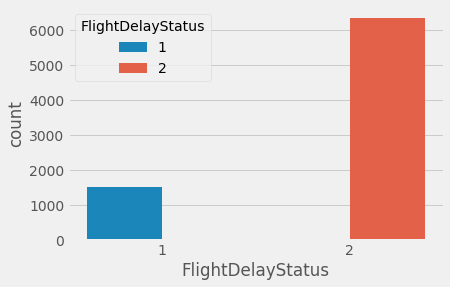

In [ ]:
# tARGET DISTRIBUTION PLOT
print(df['FlightDelayStatus'].value_counts()) 
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='FlightDelayStatus', data=df, hue='FlightDelayStatus')

In [ ]:
print(f"Average distance if there is a delay {df[df['FlightDelayStatus'] == 1]['Distance'].values.mean()} miles")
print(f"Average distance if there is no delay {df[df['FlightDelayStatus'] == 2]['Distance'].values.mean()} miles")

Average distance if there is a delay 668.1724818959842 miles
Average distance if there is no delay 761.869284137496 miles


In [ ]:
# COUNT OF NO OF ORIGIN AND DESTINATION
flight_ORIGIN = df.Origin.unique().tolist()
flight_DEST = df.Destination.unique().tolist()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Length:
Origin: 223
Destination: 215


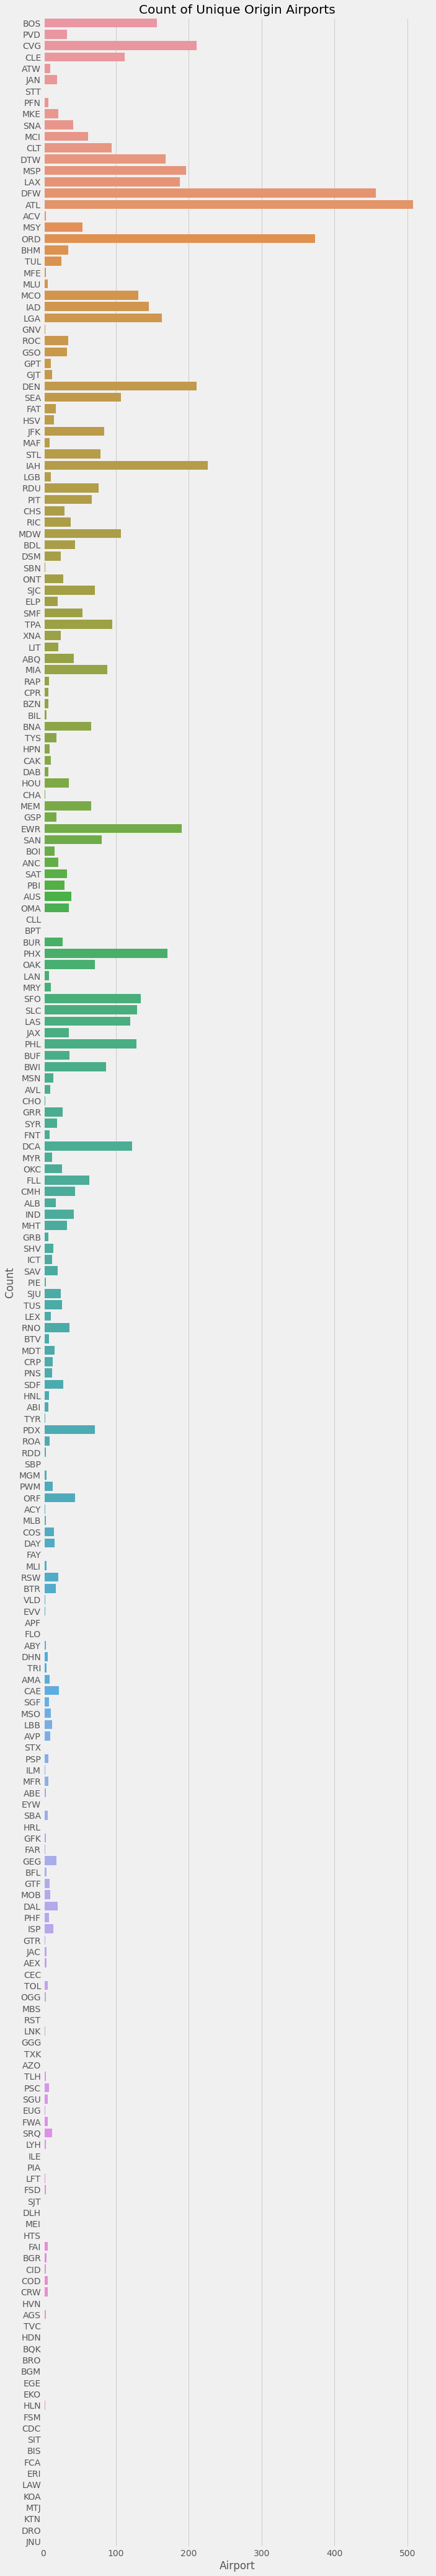

In [ ]:
#COUNTPLOT ON ORIGIN DATA
plt.figure(figsize=(10,70))
sns.countplot(y=df['Origin'], data=df, orient="h")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.title("Count of Unique Origin Airports")
plt.show()

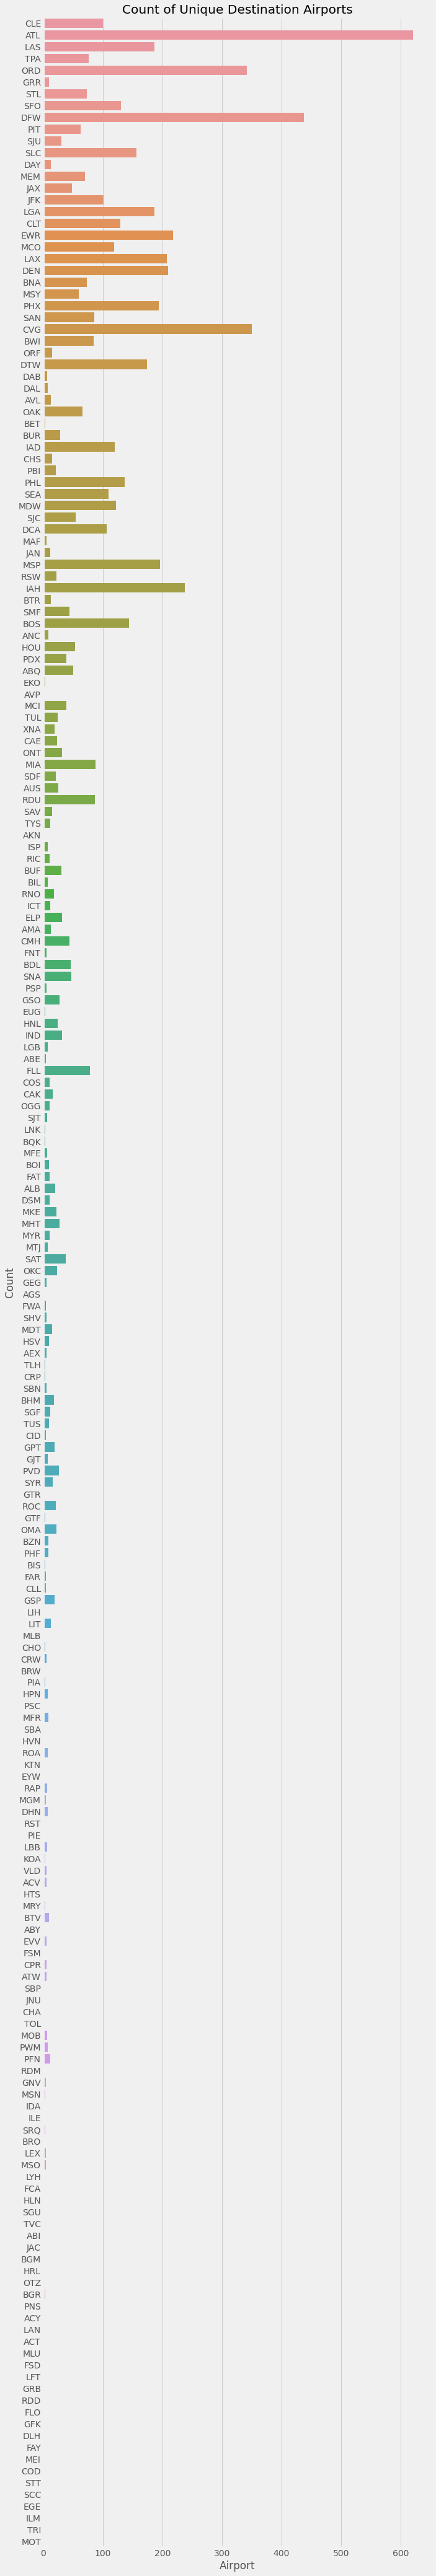

In [ ]:
#COUNTPLOT ON DESTINATION DATA
plt.figure(figsize=(10,70))
sns.countplot(y=df['Destination'], data=df, orient="h")
plt.xlabel("Airport")
plt.ylabel("Count")
plt.title("Count of Unique Destination Airports")
plt.show()

**OBSERVATIONS:** 

The above figures shows most of the Flights is moving to ATL,DFW, CVG etc.Hence we can see that total no of actual delay of flights can be seen with respect Origin, Destination.

In [ ]:
numeric_column = df.dtypes.loc[(df.dtypes == "int64") | (df.dtypes == "float64")].index.tolist()

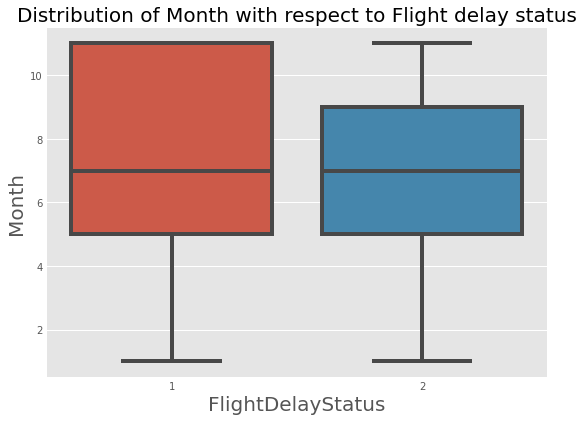

**********************************************************************************************


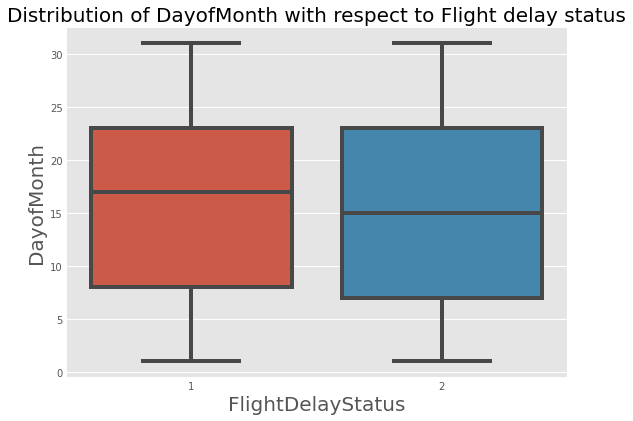

**********************************************************************************************


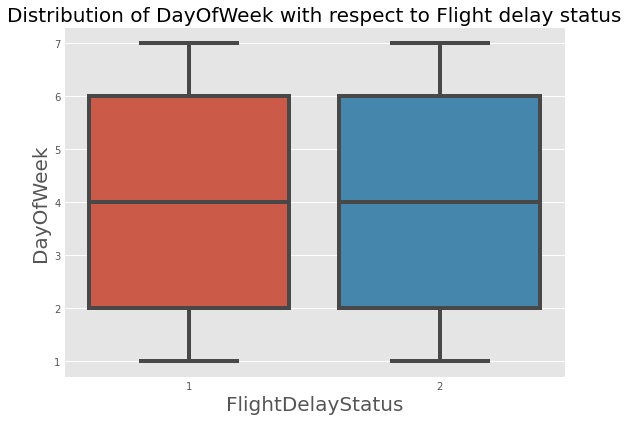

**********************************************************************************************


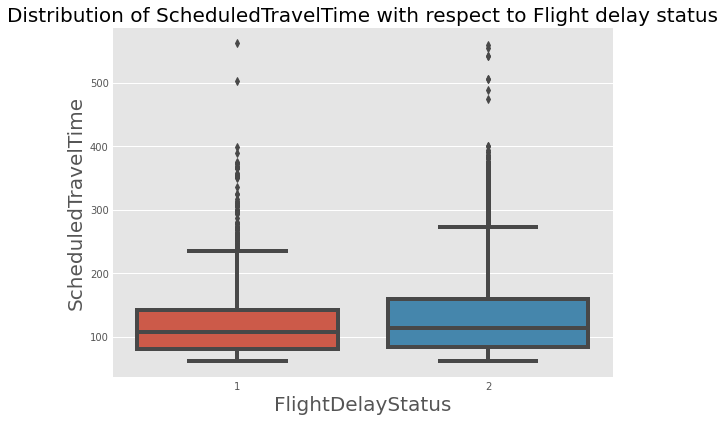

**********************************************************************************************


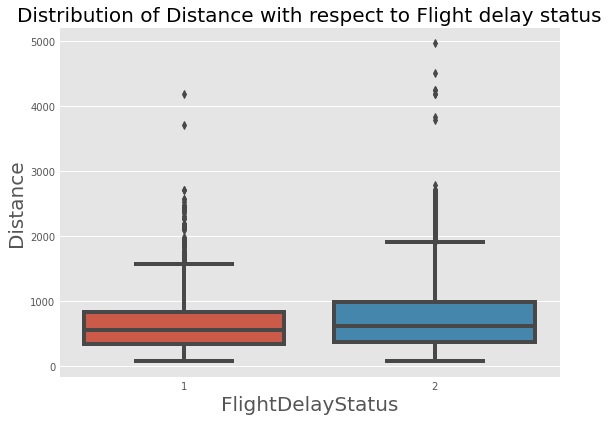

**********************************************************************************************


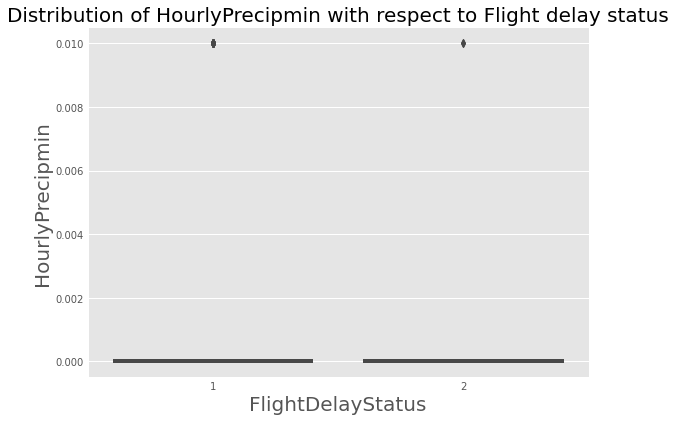

**********************************************************************************************


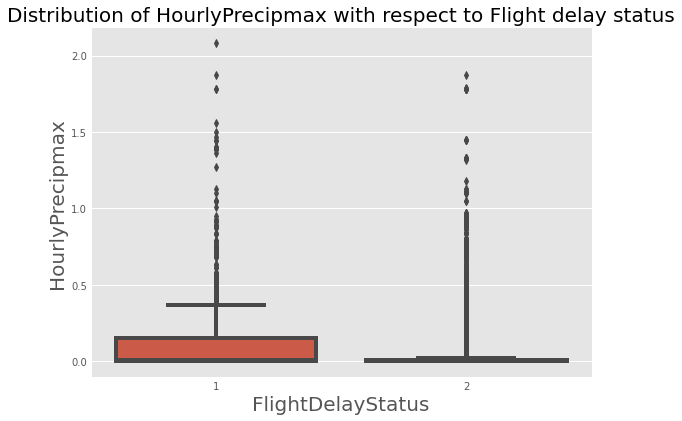

**********************************************************************************************


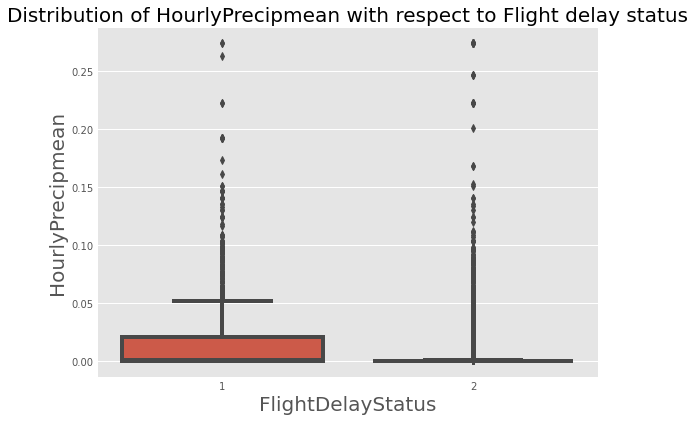

**********************************************************************************************


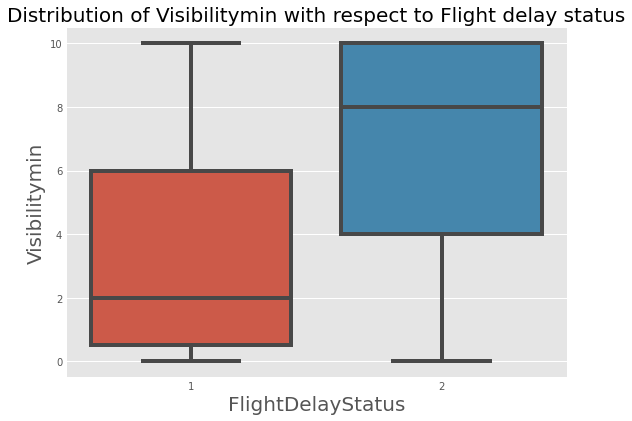

**********************************************************************************************


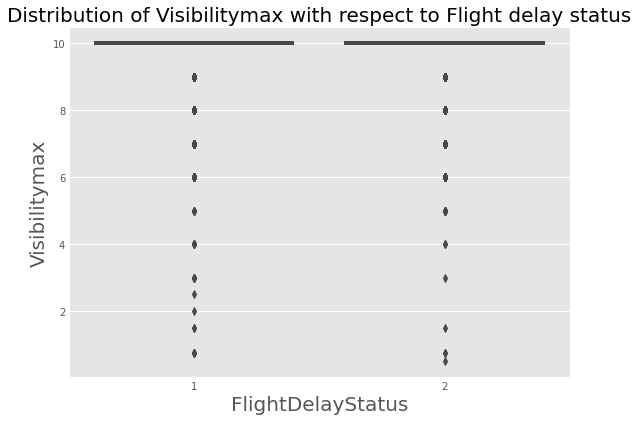

**********************************************************************************************


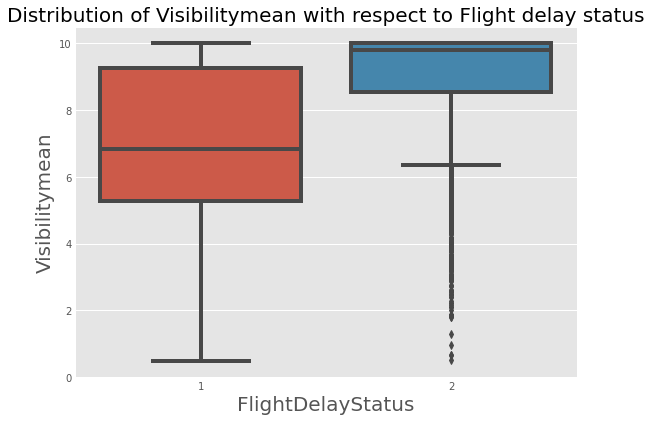

**********************************************************************************************


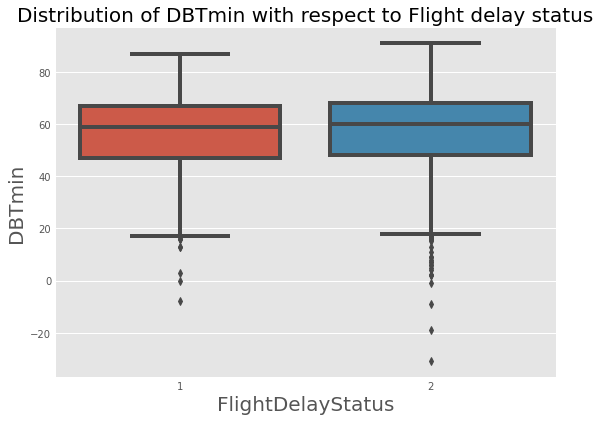

**********************************************************************************************


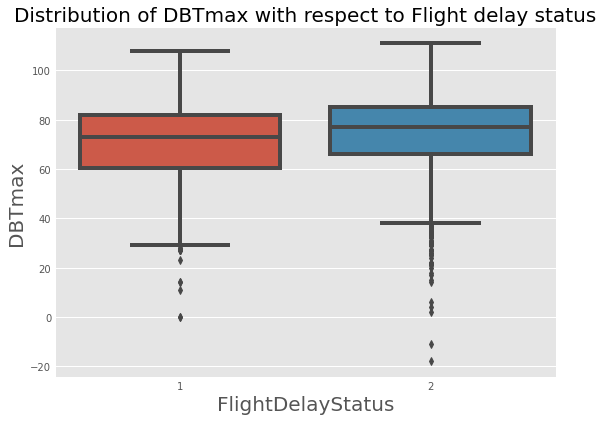

**********************************************************************************************


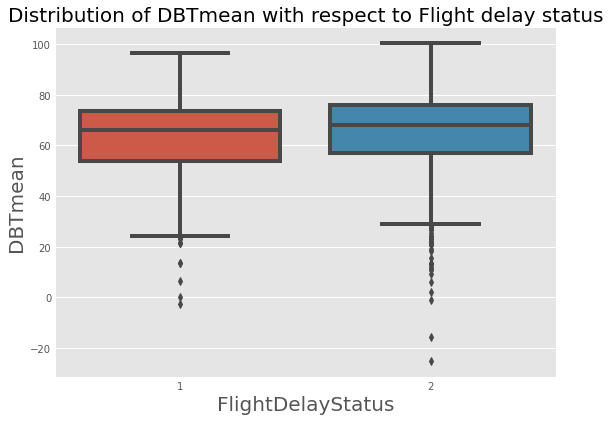

**********************************************************************************************


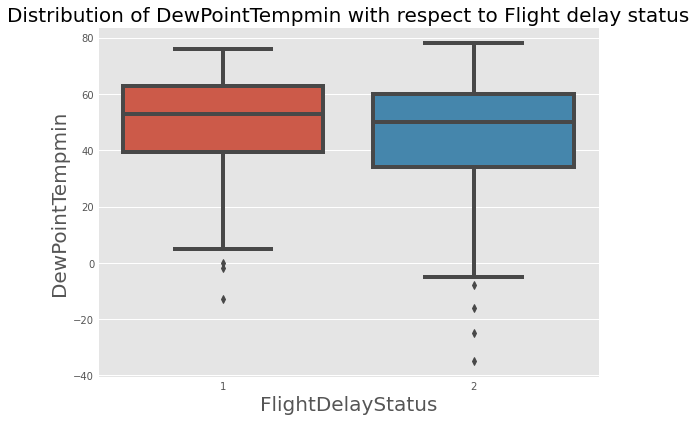

**********************************************************************************************


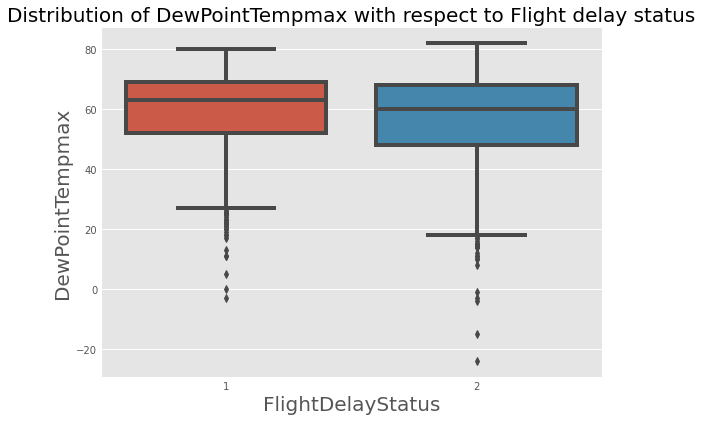

**********************************************************************************************


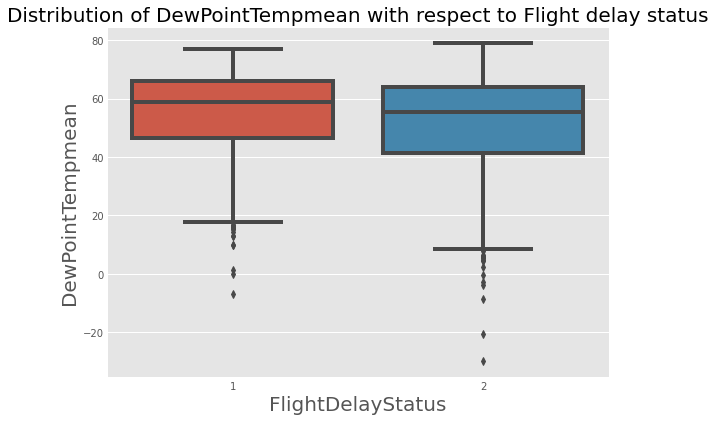

**********************************************************************************************


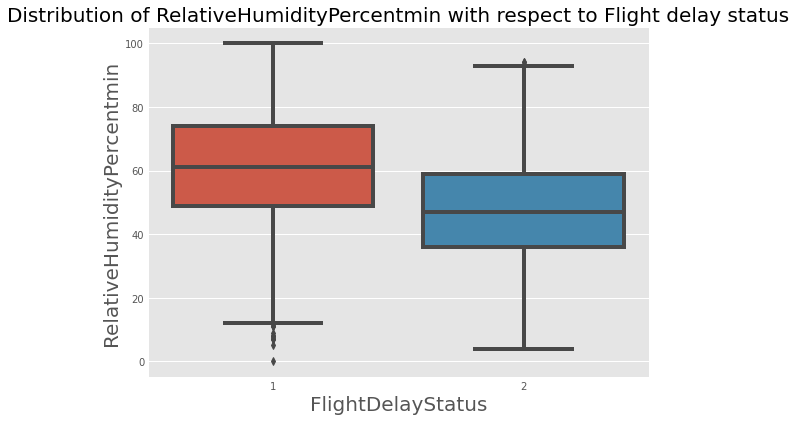

**********************************************************************************************


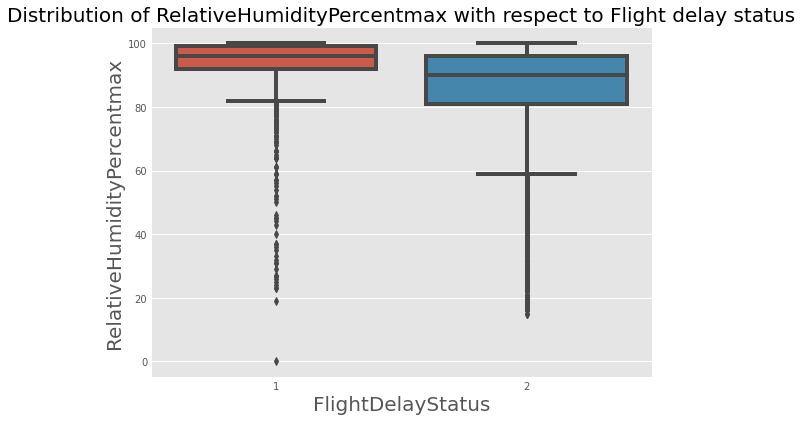

**********************************************************************************************


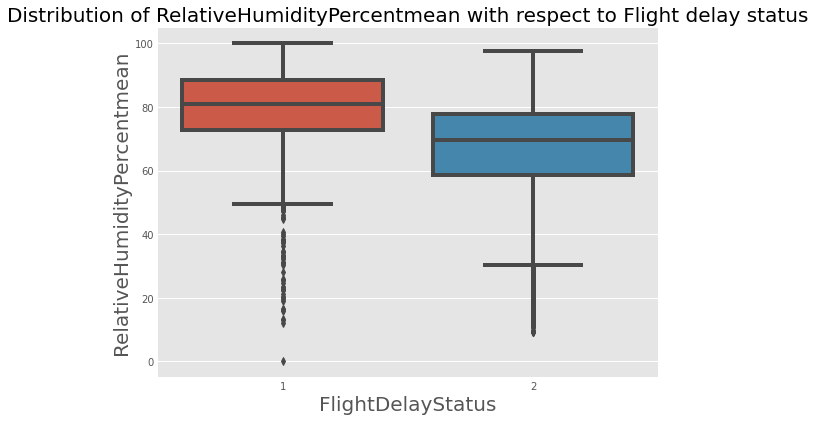

**********************************************************************************************


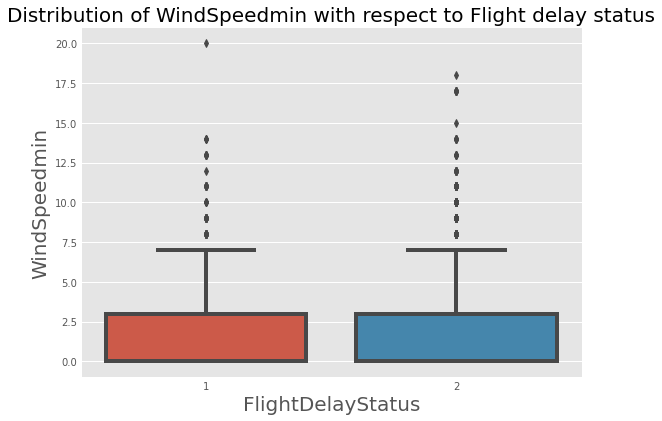

**********************************************************************************************


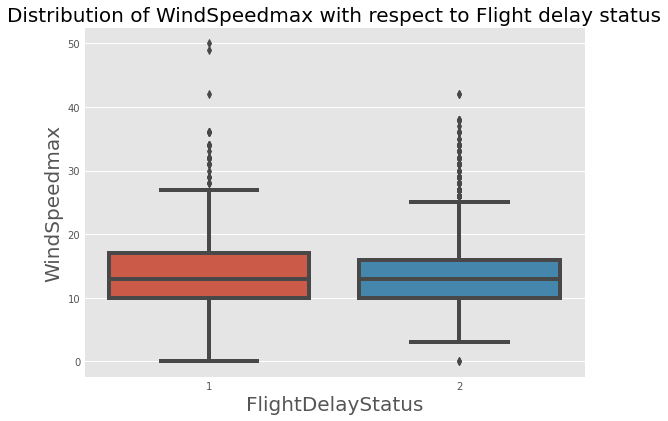

**********************************************************************************************


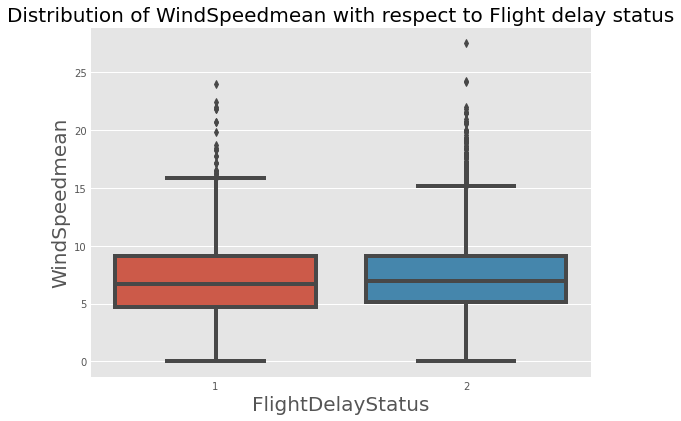

**********************************************************************************************


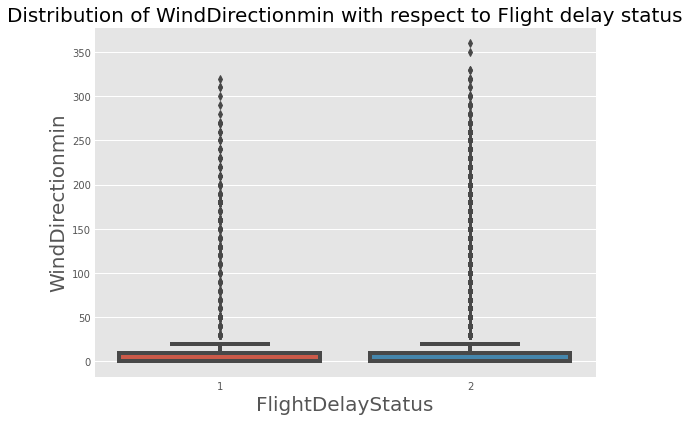

**********************************************************************************************


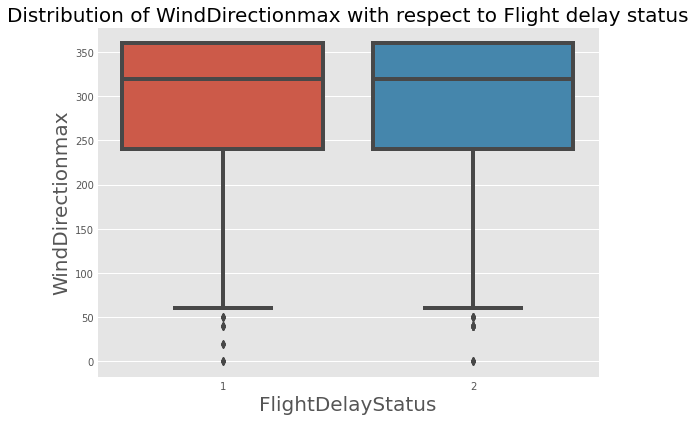

**********************************************************************************************


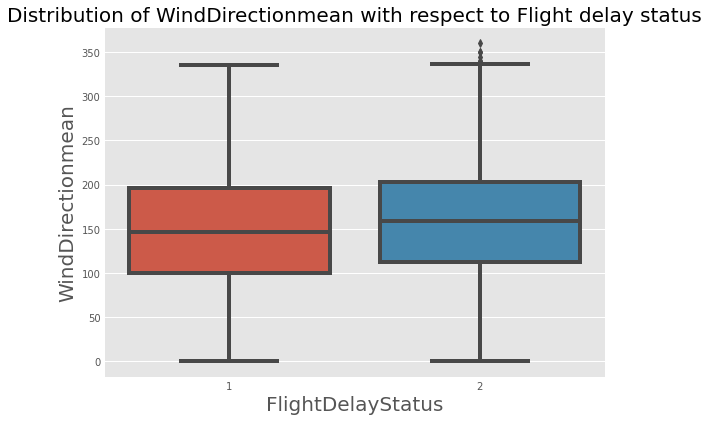

**********************************************************************************************


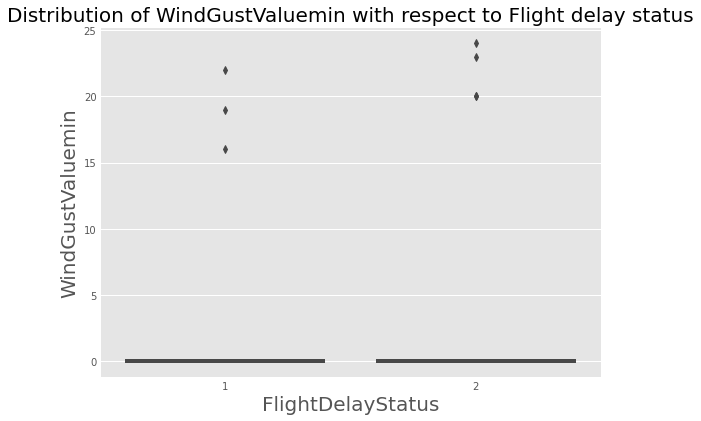

**********************************************************************************************


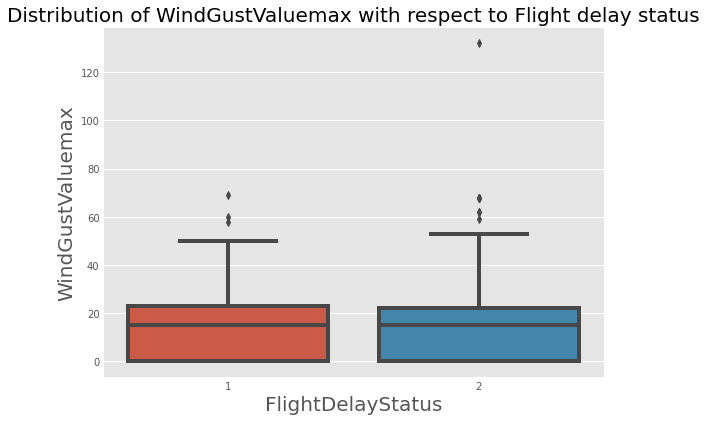

**********************************************************************************************


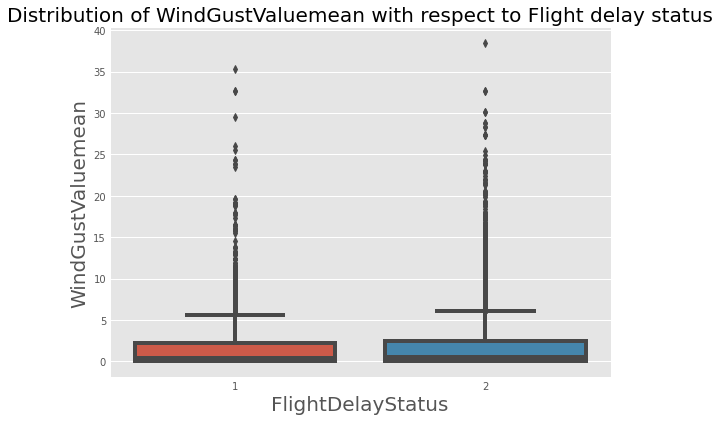

**********************************************************************************************


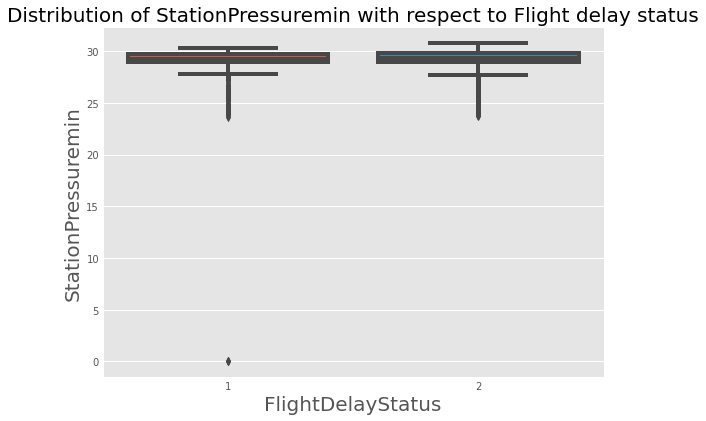

**********************************************************************************************


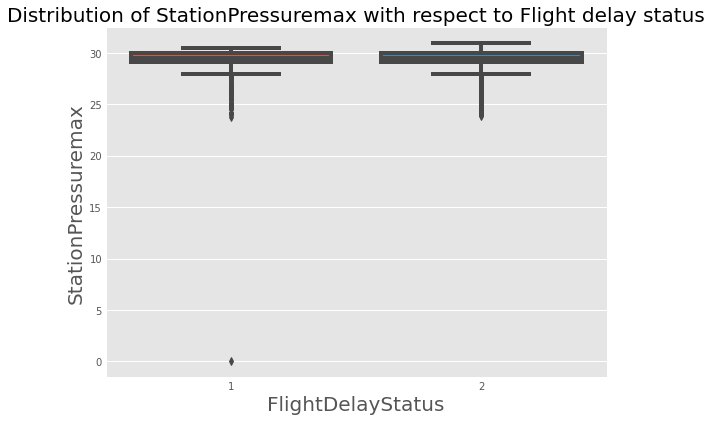

**********************************************************************************************


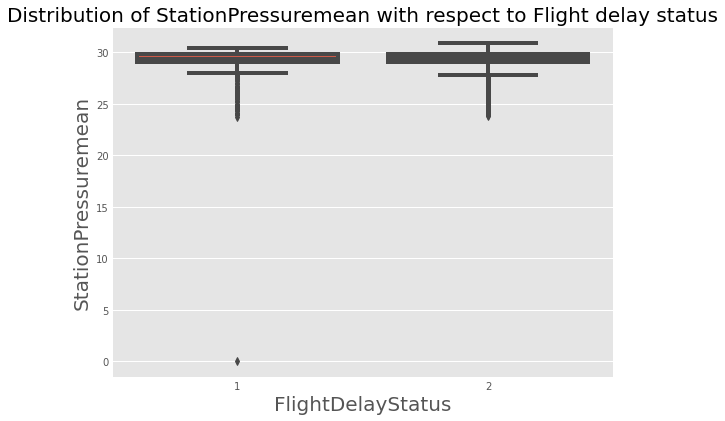

**********************************************************************************************


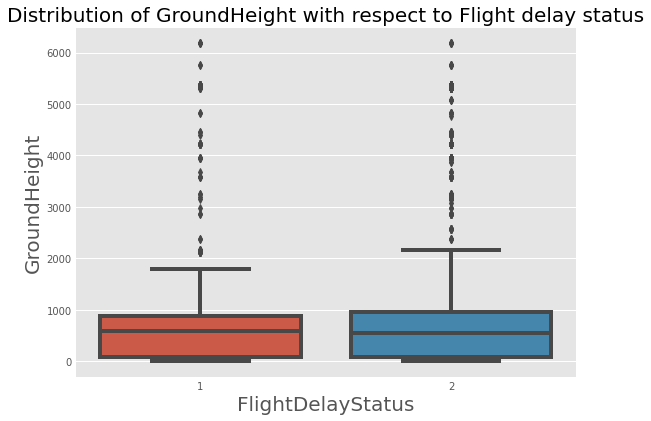

**********************************************************************************************


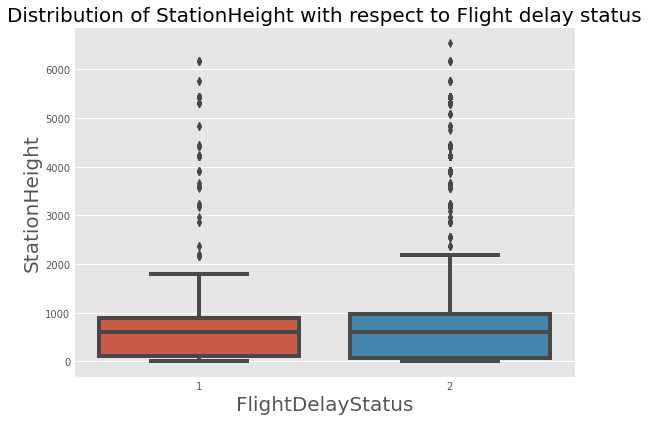

**********************************************************************************************


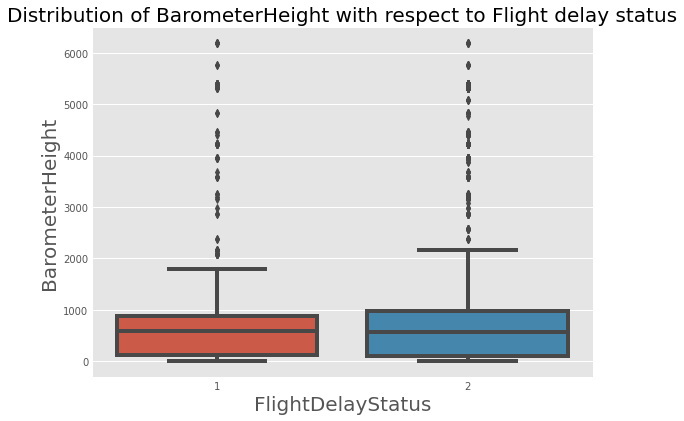

**********************************************************************************************


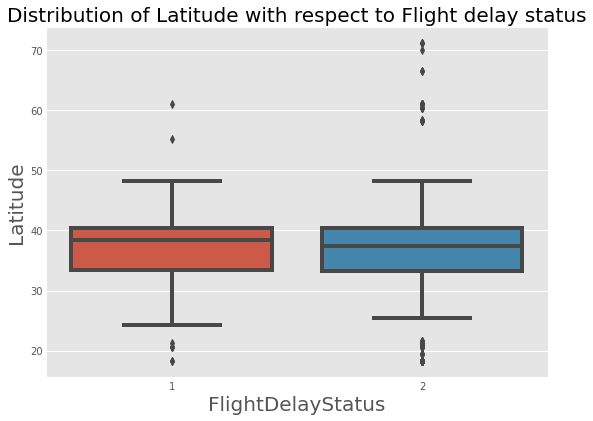

**********************************************************************************************


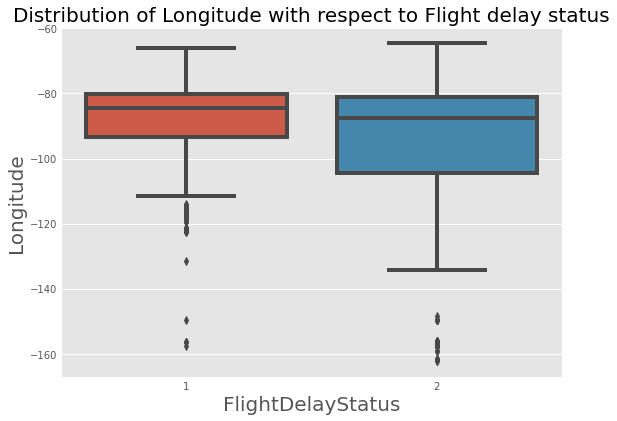

**********************************************************************************************


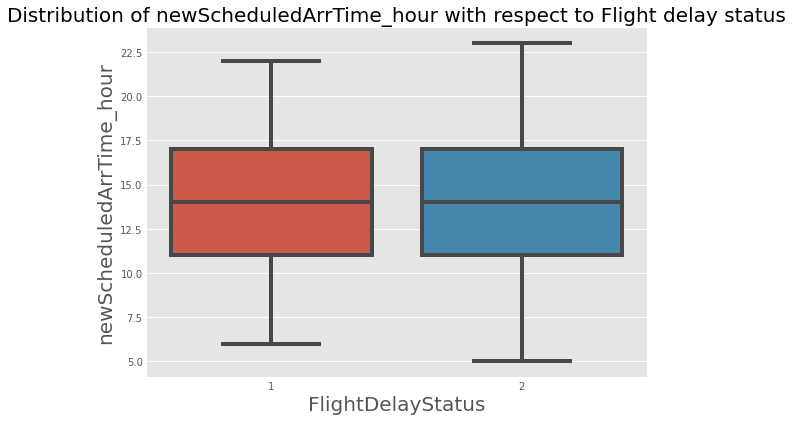

**********************************************************************************************


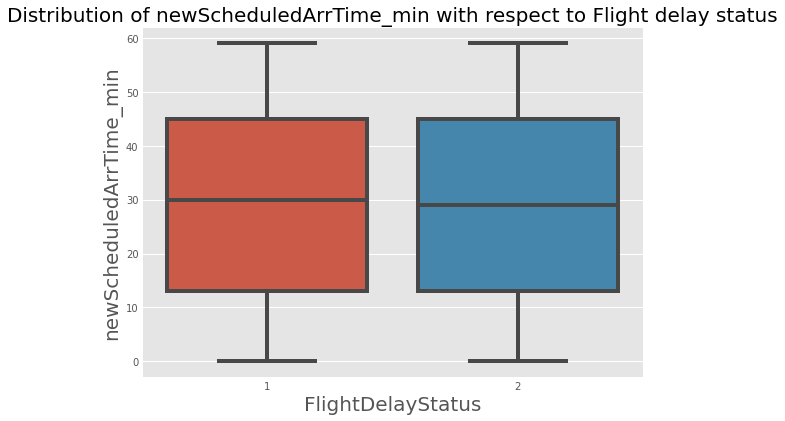

**********************************************************************************************


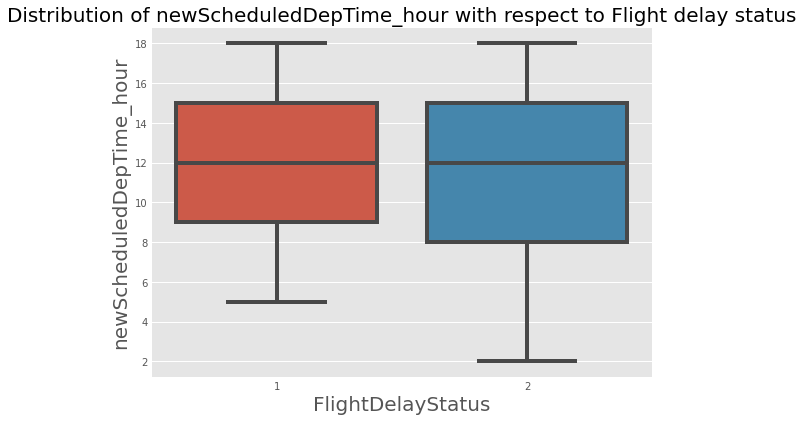

**********************************************************************************************


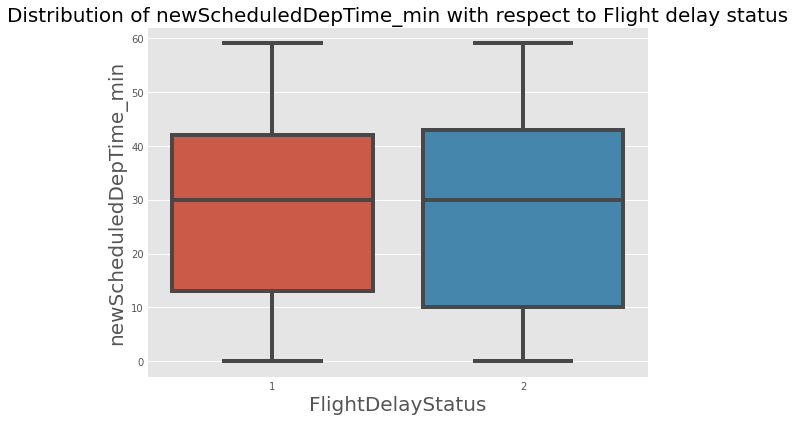

**********************************************************************************************


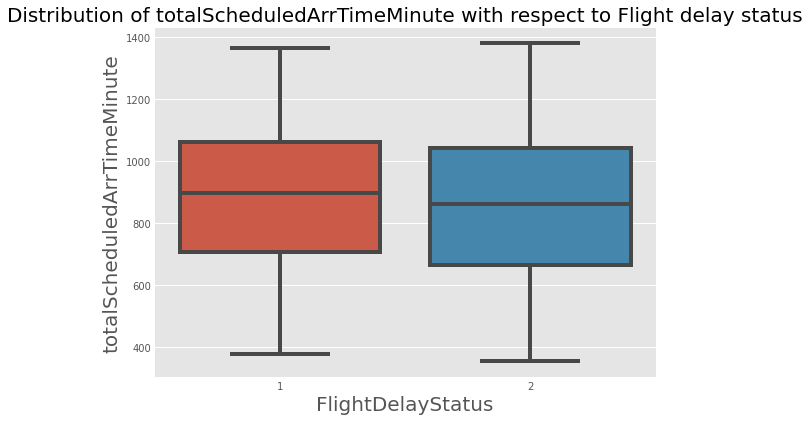

**********************************************************************************************


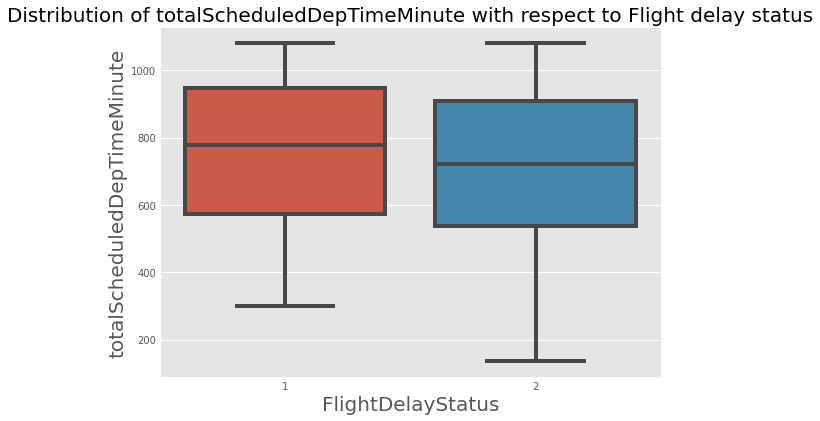

**********************************************************************************************


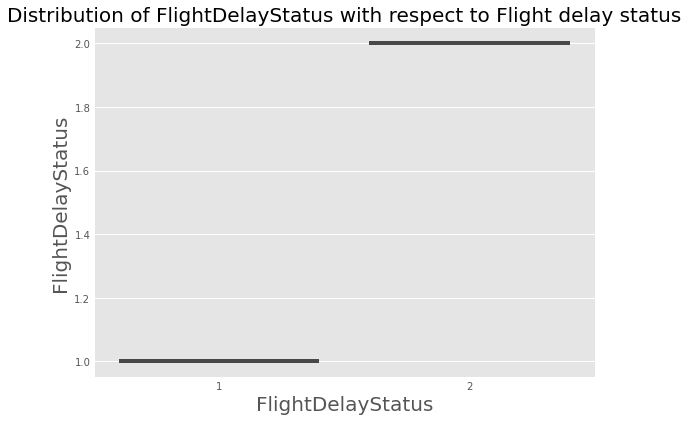

**********************************************************************************************


In [ ]:
for col in numeric_column:
    plt.style.use("ggplot")
    plt.figure(figsize=(8,6))
    sns.boxplot(data =df,  y = col, x ="FlightDelayStatus")
    plt.title("Distribution of" +" "+ col +" "+"with respect to Flight delay status", fontsize=20)
    plt.xlabel("FlightDelayStatus", fontsize=20)
    plt.ylabel(col, fontsize = 20)
    plt.show()
    print("**********************************************************************************************")

**OBSERVATIONS**

Month - Delay found from the  5th month onwards 

DayOfmonth and DayofWeek shows equal distribution of with respect to flight delay status. 

Delay is most likey to be observed when the distance is within an range of **0 - 1500kms** and for scheduled travel time of - **0 - 150min**

Visbility, DBT, DewpointTemp, Ground height, Relative humidity, station height, windspeed are important attributes

Hourly precip - There is no distribution can be seen for Hourly precip dataHourly Hence it does'nt have much impact on target column 

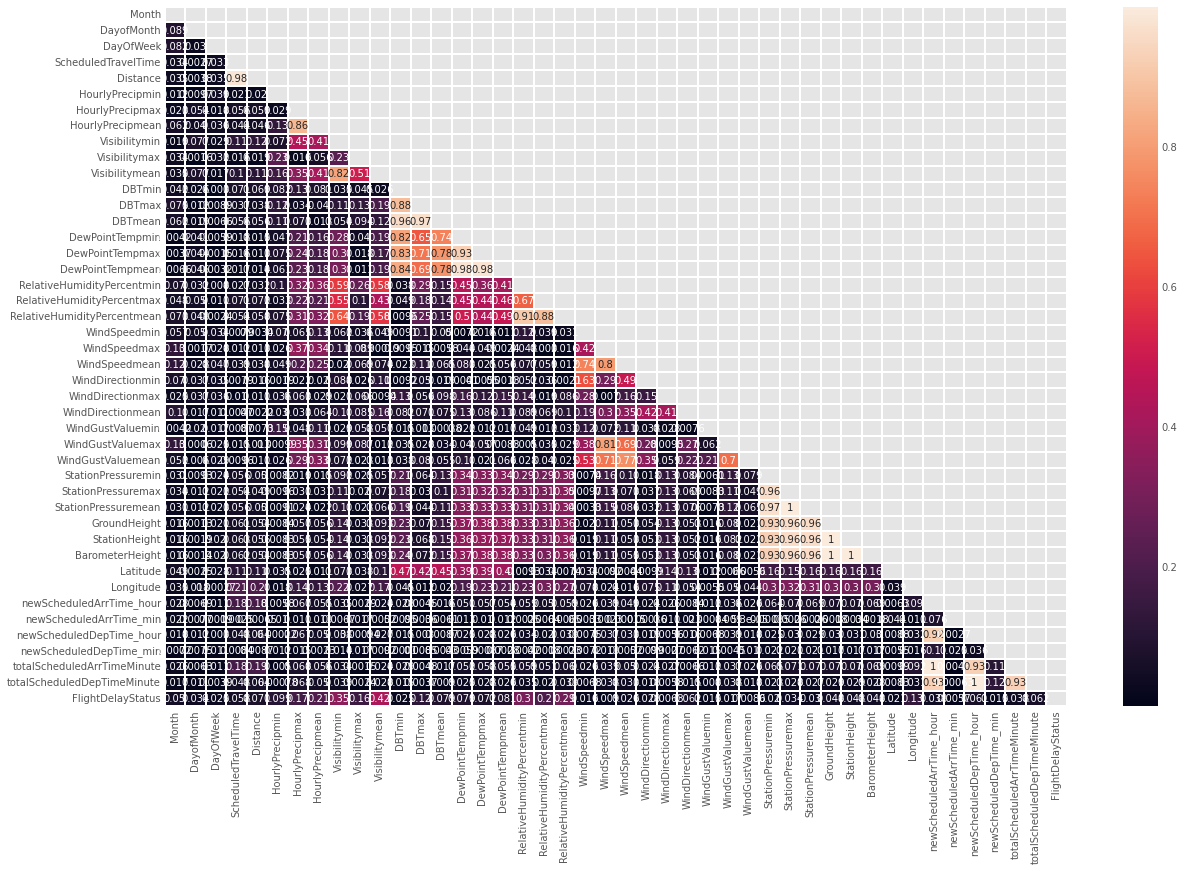

In [ ]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['Distance', 'DBTmean', 'DewPointTempmean', 'StationPressuremax', 'StationPressuremean', 'GroundHeight', 'StationHeight', 'BarometerHeight', 'totalScheduledArrTimeMinute', 'totalScheduledDepTimeMinute']


In [ ]:
 df = df.drop(['Distance', 'DBTmean', 'DewPointTempmean', 'StationPressuremean', 'GroundHeight', 'StationHeight', 'BarometerHeight', 'totalScheduledArrTimeMinute', 'totalScheduledDepTimeMinute'], axis=1)
 df.shape

(7861, 39)

##**CATEGORICAL TO NUMERIC CONVERSION**

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Origin']= label_encoder.fit_transform(df['Origin'])
df['Destination']= label_encoder.fit_transform(df['Destination'])

In [ ]:
df['TimeZone'].replace(to_replace='+4', value=4, inplace=True)
df['TimeZone'].replace(to_replace='+5', value=5, inplace=True)
df['TimeZone'].replace(to_replace='+6', value=6, inplace=True)
df['TimeZone'].replace(to_replace='+7', value=7, inplace=True)
df['TimeZone'].replace(to_replace='+8', value=8, inplace=True)
df['TimeZone'].replace(to_replace='+9', value=9, inplace=True)
df['TimeZone'].replace(to_replace='+10', value=10, inplace=True)

In [ ]:
df = df.drop(['HourlyPrecipmin','HourlyPrecipmax','HourlyPrecipmean','SkyConditionsmost_frequent'], axis=1)

# **MODEL BUILDING**


In [ ]:
# separating the feature and target columns
X = df.drop('FlightDelayStatus', axis = 1)
y = df['FlightDelayStatus']

[0.0258368  0.02677733 0.02347566 0.04540149 0.04838851 0.02196004
 0.06013985 0.0107601  0.10219058 0.02282104 0.02457871 0.02292743
 0.02353007 0.04273346 0.02807619 0.04513328 0.01545344 0.02402301
 0.02290828 0.01397802 0.02272894 0.02340669 0.00063177 0.01880942
 0.01807961 0.02323216 0.02224566 0.02206319 0.02498852 0.01756748
 0.03735982 0.03995498 0.03823953 0.03959897]


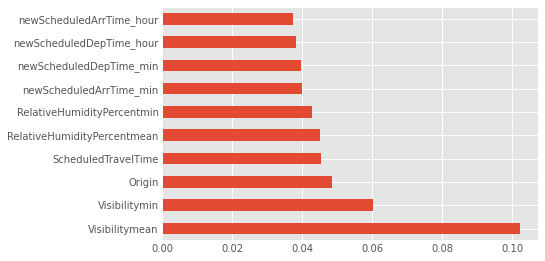

In [ ]:
#FEATURE IMPORTANT EXTRACTION
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=123)

In [ ]:
print("**********Checking the ditributing of train data************")
print(X_train.shape)
print(y_train.shape)

print("**********Checking the ditributing of test data************")
print(X_test.shape)
print(y_test.shape)

**********Checking the ditributing of train data************
(5502, 34)
(5502,)
**********Checking the ditributing of test data************
(2359, 34)
(2359,)


In [ ]:
# getting all the performane metrics and stored it in a dataframe

scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

###**LOGISTIC REGRSSION**

In [ ]:
# Defining the model
log_mod = LogisticRegression(random_state=123)

In [ ]:
# fitting it on train data
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [ ]:
# predicting it on train and validation data
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_test)
# Used a customised function for getting reports
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_val,"LogisticRegression",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.832061,0.278195,0.654867,0.390501,0.830437,0.296703,0.627907,0.402985


In [ ]:
# accuracy_score, confusion_matrix and classification_report

log_train_acc = accuracy_score(y_train, log_mod.predict(X_train))
log_test_acc = accuracy_score(y_test, y_pred_val)

print(f"Training accuracy is : {log_train_acc}")
print(f"Test accuracy is : {log_test_acc}")

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

Training accuracy is : 0.8320610687022901
Test accuracy is : 0.8304366256888512
[[ 135  320]
 [  80 1824]]
              precision    recall  f1-score   support

           1       0.63      0.30      0.40       455
           2       0.85      0.96      0.90      1904

    accuracy                           0.83      2359
   macro avg       0.74      0.63      0.65      2359
weighted avg       0.81      0.83      0.81      2359



### **NAIVE BAYES**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# predicting it on train and validation data
y_pred_train = nb_model.predict(X_train)
y_pred_val = nb_model.predict(X_test)

# Used a customised function for getting reports
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_val,"GaussianNB",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.832061,0.278195,0.654867,0.390501,0.830437,0.296703,0.627907,0.402985
1,GaussianNB,0.788804,0.654135,0.467114,0.545027,0.768970,0.630769,0.432229,0.512958


In [ ]:
# accuracy_score, confusion_matrix and classification_report

nb_train_acc = accuracy_score(y_train, nb_model.predict(X_train))
nb_test_acc = accuracy_score(y_test, y_pred_val)

print(f"Training accuracy is: {nb_train_acc}")
print(f"Test accuracy is : {nb_test_acc}")

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

Training accuracy is: 0.7888040712468194
Test accuracy is : 0.7689699025010598
[[ 287  168]
 [ 377 1527]]
              precision    recall  f1-score   support

           1       0.43      0.63      0.51       455
           2       0.90      0.80      0.85      1904

    accuracy                           0.77      2359
   macro avg       0.67      0.72      0.68      2359
weighted avg       0.81      0.77      0.78      2359



### **RANDOM FOREST CLASSIFIER**

In [ ]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train,y_train)
y_pred_train=rfc.predict(X_train)
y_pred_val = rfc.predict(X_test)

scores = get_metrics(y_train,y_pred_train,y_test,y_pred_val,"randomforestclassifer",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.832061,0.278195,0.654867,0.390501,0.830437,0.296703,0.627907,0.402985
1,GaussianNB,0.788804,0.654135,0.467114,0.545027,0.768970,0.630769,0.432229,0.512958
2,randomforestclassifer,1.000000,1.000000,1.000000,1.000000,0.840610,0.406593,0.635739,0.495979


In [ ]:
# accuracy_score, confusion_matrix and classification_report

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred_val)

print(f"Training accuracy is :  {rfc_train_acc}")
print(f"Test accuracy is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

Training accuracy is :  1.0
Test accuracy is : 0.8406104281475202
[[ 185  270]
 [ 106 1798]]
              precision    recall  f1-score   support

           1       0.64      0.41      0.50       455
           2       0.87      0.94      0.91      1904

    accuracy                           0.84      2359
   macro avg       0.75      0.68      0.70      2359
weighted avg       0.82      0.84      0.83      2359



### **DECISION TREE WITH GRID SEARCH AND CV**

In [ ]:
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }


dt = DecisionTreeClassifier(random_state=123)
clf_dt_grid = GridSearchCV(dt, param_grid,cv=5)
clf_dt_grid.fit(X_train, y_train)

clf_dt_grid.best_params_

y_pred_train = clf_dt_grid.predict(X_train)
y_pred_val = clf_dt_grid.predict(X_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_val,"DecisionTree_CV_BestParam",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.832061,0.278195,0.654867,0.390501,0.830437,0.296703,0.627907,0.402985
1,GaussianNB,0.788804,0.654135,0.467114,0.545027,0.768970,0.630769,0.432229,0.512958
2,randomforestclassifer,1.000000,1.000000,1.000000,1.000000,0.840610,0.406593,0.635739,0.495979
3,DecisionTree_CV_BestParam,0.844965,0.524436,0.616575,0.566785,0.815176,0.479121,0.522782,0.500000


In [ ]:
# accuracy_score, confusion_matrix and classification_report

clf_dt_grid_train = accuracy_score(y_train, clf_dt_grid.predict(X_train))
clf_dt_grid_test = accuracy_score(y_test, y_pred_val)

print(f"Training accuracy  is : {clf_dt_grid_train}")
print(f"Test accuracy  is : {clf_dt_grid_test}")

Training accuracy  is : 0.8449654671028717
Test accuracy  is : 0.8151759220008478


###**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_val = knn.predict(X_test)

scores = get_metrics(y_train,y_pred_train,y_test,y_pred_val,"KNNclassifer",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.832061,0.278195,0.654867,0.390501,0.830437,0.296703,0.627907,0.402985
1,GaussianNB,0.788804,0.654135,0.467114,0.545027,0.768970,0.630769,0.432229,0.512958
2,randomforestclassifer,1.000000,1.000000,1.000000,1.000000,0.840610,0.406593,0.635739,0.495979
3,DecisionTree_CV_BestParam,0.844965,0.524436,0.616575,0.566785,0.815176,0.479121,0.522782,0.500000
4,KNNclassifer,0.854598,0.355263,0.768293,0.485861,0.802459,0.195604,0.470899,0.276398


In [ ]:
# accuracy_score, confusion_matrix and classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred_val)

print(f"Training accuracy is : {knn_train_acc}")
print(f"Test accuracy is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred_val))
print(classification_report(y_test, y_pred_val))

Training accuracy is : 0.8545983278807706
Test accuracy is : 0.8024586689275116
[[  89  366]
 [ 100 1804]]
              precision    recall  f1-score   support

           1       0.47      0.20      0.28       455
           2       0.83      0.95      0.89      1904

    accuracy                           0.80      2359
   macro avg       0.65      0.57      0.58      2359
weighted avg       0.76      0.80      0.77      2359



###**MODEL COMPARISON**

In [ ]:
models = pd.DataFrame({
    'Model' : ['NaiveBayes','KNN','LogisticRegression','DecisionTree','Randomforest'],
    'Score' : [ nb_test_acc,knn_test_acc, log_test_acc,clf_dt_grid_test,rfc_test_acc]
    })



models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Randomforest,0.840610
2,LogisticRegression,0.830437
3,DecisionTree,0.815176
1,KNN,0.802459
0,NaiveBayes,0.768970


In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

# **ANALYSING TEST DATA**

####**MERGING TEST DATA**

In [ ]:
# Reading the test data
test_path = "/content/drive/MyDrive/predict/Test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155


In [ ]:
# Checking counts and value counts for the data
print("************Checking counts and values counts for the test data**********")
count_stats(df_test)

************Checking counts and values counts for the test data**********
shape of df  (6566, 11)
no_of_rows in df 6566
colname: FlightNumber , their value count in 6566
% unique at  FlightNumber 100.0 %
---------------------------------------
shape of df  (6566, 11)
no_of_rows in df 6566
colname: Year , their value count in 1
% unique at  Year 0.015229972586049346 %
---------------------------------------
shape of df  (6566, 11)
no_of_rows in df 6566
colname: Month , their value count in 4
% unique at  Month 0.06091989034419738 %
---------------------------------------
shape of df  (6566, 11)
no_of_rows in df 6566
colname: DayofMonth , their value count in 31
% unique at  DayofMonth 0.47212915016752965 %
---------------------------------------
shape of df  (6566, 11)
no_of_rows in df 6566
colname: DayOfWeek , their value count in 7
% unique at  DayOfWeek 0.10660980810234541 %
---------------------------------------
shape of df  (6566, 11)
no_of_rows in df 6566
colname: ScheduledDepTim

In [ ]:
pattern(df_test)

{'FlightNumber': ['_', '_'],
 'Year': [],
 'Month': [],
 'DayofMonth': [],
 'DayOfWeek': [],
 'ScheduledDepTime': [],
 'ScheduledArrTime': [],
 'ScheduledTravelTime': [],
 'Origin': [],
 'Destination': [],
 'Distance': []}

**READING HOURLY AND HPD DATA**

In [ ]:
test_hourly_03 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200503hourly.txt")
test_hourly_07 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200507hourly.txt")
test_hourly_09 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200509hourly.txt")
test_hourly_11 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200511hourly.txt")


In [ ]:
test_hpd_03 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200503hpd.txt")
test_hpd_07 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200507hpd.txt")
test_hpd_09 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200509hpd.txt")
test_hpd_11 = pd.read_csv(r"/content/drive/MyDrive/predict/2005/200511hpd.txt")


**CONCATING BASED ON ROWS**

In [ ]:
test_hourly_records = pd.concat([test_hourly_03, test_hourly_07, test_hourly_09,test_hourly_11],axis=0)

test_hpd_records = pd.concat([test_hpd_03, test_hpd_07, test_hpd_09,test_hpd_11],axis=0)

In [ ]:
test_hourly_records.shape

(5031729, 12)

In [ ]:
test_hourly_records.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,4843,20050301,10,FEW008 SCT012 OVC026,1.75SM,NaN,NaN,NaN,6.0,VRB,0.0,NaN
1,13874,20050301,10,SCT023 BKN030,10SM,NaN,NaN,NaN,14.0,310,0.0,NaN
2,14765,20050301,10,FEW007 SCT010 OVC015,2SM,NaN,NaN,NaN,19.0,030,26.0,NaN
3,14777,20050301,10,OVC011,2.5SM,NaN,NaN,NaN,5.0,040,0.0,NaN
4,14819,20050301,10,FEW015 OVC060,2SM,NaN,NaN,NaN,9.0,310,0.0,NaN


In [ ]:
test_hpd_records.shape

(4410021, 4)

In [ ]:
test_hpd_records.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
0,27401,20050301,15,0.0
1,24201,20050301,17,0.0
2,13944,20050301,30,0.0
3,14704,20050301,34,0.0
4,27401,20050301,35,0.0


**COUNT_STATS ON HOURLY AND HPD DATA**

In [ ]:
print("****************hourly_records***********************")
print()
count_stats(test_hourly_records)
print()
print("***************hpd_records**************************")
print()
count_stats(test_hpd_records)

****************hourly_records***********************

shape of df  (5031729, 12)
no_of_rows in df 5031729
colname: WeatherStationID , their value count in 1690
% unique at  WeatherStationID 0.03358686447541193 %
---------------------------------------
shape of df  (5031729, 12)
no_of_rows in df 5031729
colname: YearMonthDay , their value count in 122
% unique at  YearMonthDay 0.0024246138852072516 %
---------------------------------------
shape of df  (5031729, 12)
no_of_rows in df 5031729
colname: Time , their value count in 1423
% unique at  Time 0.028280537365982943 %
---------------------------------------
shape of df  (5031729, 12)
no_of_rows in df 5031729
colname: SkyConditions , their value count in 215910
% unique at  SkyConditions 4.2909703602876865 %
---------------------------------------
shape of df  (5031729, 12)
no_of_rows in df 5031729
colname: Visibility , their value count in 81
% unique at  Visibility 0.0016097846287031754 %
---------------------------------------
sh

**RESETTING INDEX FOR BOTH DATA - Default to zero**

In [ ]:
# Resetting index
test_hourly_records = test_hourly_records.reset_index(drop=True)
test_hpd_records = test_hpd_records.reset_index(drop=True)

**EDA ON HOURLY DATA**

In [ ]:
# # CHECKING PATTRENS IN HOURLY DATA
# pattern(test_hourly_records)
# #----------------------------
# Pattern found are:
# {'WeatherStationID': [],
#  'YearMonthDay': [],
#  'Time': [],
#  'SkyConditions': [],
#  'Visibility': [],
#  'DBT': ['.'],
#  'DewPointTemp': ['.'],
#  'RelativeHumidityPercent': ['.'],
#  'WindSpeed': ['.'],
#  'WindDirection': [],
#  'WindGustValue': ['.'],
#  'StationPressure': ['.']}

In [ ]:
# EXTRACTING YEAR MONTH AND DATE FROM HOURLY DATA
test_hourly_records["YearMonthDay"] = pd.to_datetime(test_hourly_records["YearMonthDay"], format='%Y%m%d')
#------------------------------------------------------------------------------------------------

Year = pd.DatetimeIndex(test_hourly_records["YearMonthDay"]).year
Month = pd.DatetimeIndex(test_hourly_records["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(test_hourly_records["YearMonthDay"]).day
DayOfWeek = pd.DatetimeIndex(test_hourly_records["YearMonthDay"]).weekday
#------------------------------------------------------------------------------------------------

#ASSIGNING ABOVE VARIABLES TO DERIVE NEW COLUMNS
test_hourly_records["Year"] = Year
test_hourly_records["Month"] = Month
test_hourly_records["DayofMonth"] = DayOfMonth
test_hourly_records["DayOfWeek"] = DayOfWeek
#ISO FORMAT FOR WEEKENDS
test_hourly_records["DayOfWeek"] = test_hourly_records["DayOfWeek"] + 1 



In [ ]:
# PREPROCESSING ON HOURLY DATA,SINCE THERE ARE UNNECESSARY PATTERNS SUCH AS 'SM','/','VRB','-'

test_hourly_records["Visibility"] = test_hourly_records["Visibility"].apply(lambda x : str(x).replace("SM", ""))
test_hourly_records["Visibility"] = test_hourly_records["Visibility"].apply(lambda x : str(x).replace("/", ""))
test_hourly_records["Visibility"] = test_hourly_records["Visibility"].apply(lambda x : str(x).replace("V", ""))
test_hourly_records["WindDirection"] = test_hourly_records["WindDirection"].replace(to_replace = "VRB", value = "000")
#------------------------------------------------------------------------------------------------

test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].apply(lambda x : str(x).replace("/", ""))
test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].apply(lambda x : str(x).replace("-", ""))
test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].apply(lambda x : str(x).replace(".", ""))
test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].apply(lambda x : str(x))
test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].replace(to_replace = "", value = "0.0")
#------------------------------------------------------------------------------------------------

test_hourly_records["Visibility"] = test_hourly_records["Visibility"].astype("float64")
test_hourly_records["WindSpeed"] = test_hourly_records["WindSpeed"].astype("float64")
test_hourly_records["WindDirection"] = test_hourly_records["WindDirection"].astype("float64")
#------------------------------------------------------------------------------------------------

test_hourly_records.shape

(5031729, 16)

In [ ]:
# REMOVING 'YEARMONTHDAY' ,'TIME', 'YEAR' IN HPD DATA,SINCE DERVIED USEFUL COLUMNS FROM IT
test_hourly_records = test_hourly_records.drop(["YearMonthDay", "Time", "Year"], axis=1)
#----------------------------------------------------------------------------------------

# GROUPING W.R.T COMMON COLUMNS AND AGGREGATING WITH OTHER COLUMNS
total_test_hourly_records = test_hourly_records.groupby(["WeatherStationID","Month", "DayofMonth", "DayOfWeek"], as_index = False).aggregate({"SkyConditions":[get_freq],
"Visibility":["min", "max","mean"],"DBT" : ["min", "max","mean"], "DewPointTemp" : ["min", "max","mean"],
"RelativeHumidityPercent" : ["min", "max", "mean"],"WindSpeed":["min", "max","mean"], "WindDirection" : ["min", "max","mean"],
"WindGustValue" : ["min", "max","mean"], "StationPressure" :["min", "max","mean"]})
#----------------------------------------------------------------------------------------

# CONCATINATING USING JOIN FUNCTION  
total_test_hourly_records.columns = ["".join(col) for col in total_test_hourly_records.columns]

In [ ]:
total_test_hourly_records.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,SkyConditionsmost_frequent,Visibilitymin,Visibilitymax,Visibilitymean,DBTmin,DBTmax,...,WindSpeedmean,WindDirectionmin,WindDirectionmax,WindDirectionmean,WindGustValuemin,WindGustValuemax,WindGustValuemean,StationPressuremin,StationPressuremax,StationPressuremean
0,3011,3,1,2,OVC037,0.5,10.0,7.710938,9.0,39.0,...,29.310345,0.0,280.0,91.724138,0.0,0.0,0.0,30.01,30.07,30.031250
1,3011,3,2,3,CLR,10.0,10.0,10.000000,14.0,41.0,...,45.000000,0.0,280.0,114.090909,0.0,0.0,0.0,30.03,30.12,30.073182
2,3011,3,3,4,CLR,8.0,10.0,9.923077,19.0,37.0,...,35.000000,0.0,280.0,110.769231,0.0,0.0,0.0,30.02,30.13,30.062692
3,3011,3,4,5,CLR,10.0,10.0,10.000000,16.0,43.0,...,44.583333,0.0,270.0,127.500000,0.0,0.0,0.0,30.10,30.18,30.139167
4,3011,3,5,6,CLR,2.5,10.0,9.462963,27.0,45.0,...,38.846154,0.0,270.0,105.769231,0.0,0.0,0.0,30.16,30.22,30.185926


**EDA ON HPD DATA**

In [ ]:
# CHECKING PATTRENS IN HPD DATA
# pattern(test_hpd_records)
# -------------------------
# Pattern found are:
# {'WeatherStationID': [], 'YearMonthDay': [], 'Time': [], 'HourlyPrecip': ['.']}

In [ ]:
# EXTRACTING YEAR MONTH AND DATE FROM HPD DATA
test_hpd_records["YearMonthDay"] = pd.to_datetime(test_hpd_records["YearMonthDay"], format='%Y%m%d')
#------------------------------------------------------------------------------------------------

Year = pd.DatetimeIndex(test_hpd_records["YearMonthDay"]).year
Month = pd.DatetimeIndex(test_hpd_records["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(test_hpd_records["YearMonthDay"]).day
DayOfWeek = pd.DatetimeIndex(test_hpd_records["YearMonthDay"]).weekday
#------------------------------------------------------------------------------------------------
#ASSIGNING ABOVE VARIABLES TO DERIVE NEW COLUMNS
test_hpd_records["Year"] = Year
test_hpd_records["Month"] = Month
test_hpd_records["DayofMonth"] = DayOfMonth
test_hpd_records["DayOfWeek"] = DayOfWeek
#ISO FORMAT FOR WEEKENDS
test_hpd_records["DayOfWeek"] = test_hpd_records["DayOfWeek"] + 1 

In [ ]:
# REMOVING 'YEARMONTHDAY' ,'TIME', 'YEAR' IN HPD DATA,SINCE DERVIED USEFUL COLUMNS FROM IT
test_hpd_records = test_hpd_records.drop(["YearMonthDay", "Time", "Year"], axis=1)
#-----------------------------------------------------------------------------------------

# GROUPING W.R.T COMMON COLUMNS AND AGGREGATING WITH OTHER COLUMNS
total_test_hpd_records = test_hpd_records.groupby(["WeatherStationID","Month", "DayofMonth", "DayOfWeek"], as_index = False).aggregate({"HourlyPrecip" : ["min", "max","mean"]})
#-----------------------------------------------------------------------------------------

# CONCATINATING USING JOIN FUNCTION
total_test_hpd_records.columns = ["".join(col) for col in total_test_hpd_records.columns]
total_test_hpd_records.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,HourlyPrecipmin,HourlyPrecipmax,HourlyPrecipmean
0,3011,3,1,2,0.0,0.0,0.0
1,3011,3,2,3,0.0,0.0,0.0
2,3011,3,3,4,0.0,0.0,0.0
3,3011,3,4,5,0.0,0.0,0.0
4,3011,3,5,6,0.0,0.0,0.0


**MERGING BOTH HOURLY AND HPD DATA USING INNER JOIN**

In [ ]:
total_test_hourly_records.shape,total_test_hpd_records.shape

((193529, 29), (193111, 7))

In [ ]:
#MERGING BASED ON WHETHERSTATIONID,MONTH,DAYOFMONTH,DAYOFWEEK
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
total_test_hpd_hourly_records = pd.merge(left = total_test_hpd_records, right=total_test_hourly_records, on = ["WeatherStationID", "Month", "DayOfWeek", "DayofMonth"], how = "inner")
total_test_hpd_hourly_records.shape

(193105, 32)

**ANALYSING STATION DATA**

In [ ]:
test_stn_records = pd.read_csv(r"/content/drive/MyDrive/predict/AllStationsData_PHD.txt", sep = "|")

In [ ]:
test_stn_records.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [ ]:
# CHECKING PATTERNS IN STATION DATA
# pattern(test_stn_records)
# ---------------------------
# {'WeatherStationID': [],
#  'AirportID': [],
#  'GroundHeight': [],
#  'StationHeight': [],
#  'BarometerHeight': [],
#  'Latitude': ['.'],
#  'Longitude': ['-', '.'],
#  'TimeZone': ['+']}

**MERGING BOTH TOTAL_HPD_HOURLY AND STN_RECORDS DATA USING INNER JOIN**

In [ ]:
#MERGING BASED ON WHETHERSTATIONID
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
merged_test_df = pd.merge(left = total_test_hpd_hourly_records, right=test_stn_records, left_on= "WeatherStationID", right_on="WeatherStationID", how = "inner")

In [ ]:
# checking top5 records
merged_test_df.head()

,WeatherStationID,Month,DayofMonth,DayOfWeek,HourlyPrecipmin,HourlyPrecipmax,HourlyPrecipmean,SkyConditionsmost_frequent,Visibilitymin,Visibilitymax,...,StationPressuremin,StationPressuremax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,3,1,2,0.0,0.0,0.0,OVC037,0.5,10.0,...,30.01,30.07,30.031250,TEX,0,0,0,37.57,-107.55,+7
1,3011,3,2,3,0.0,0.0,0.0,CLR,10.0,10.0,...,30.03,30.12,30.073182,TEX,0,0,0,37.57,-107.55,+7
2,3011,3,3,4,0.0,0.0,0.0,CLR,8.0,10.0,...,30.02,30.13,30.062692,TEX,0,0,0,37.57,-107.55,+7
3,3011,3,4,5,0.0,0.0,0.0,CLR,10.0,10.0,...,30.10,30.18,30.139167,TEX,0,0,0,37.57,-107.55,+7
4,3011,3,5,6,0.0,0.0,0.0,CLR,2.5,10.0,...,30.16,30.22,30.185926,TEX,0,0,0,37.57,-107.55,+7


In [ ]:
merged_test_df.shape

(192938, 39)

In [ ]:
#  merged_test_df.to_csv("merged_test_df.csv",index=False)

**MERGING BOTH MERGE_TEST_DF WITH OUR TEST DATASET**

In [ ]:
# Reading the test data
test_path = "/content/drive/MyDrive/predict/Test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,616
1,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,278
2,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,239
3,SAV_CVG_87264,2005,11,18,5,1120,1302,102,SAV,CVG,515
4,SBP_LAX_68158,2005,7,5,2,630,733,63,SBP,LAX,155


In [ ]:
# test data is merged to aggregated files
df_test_origin = pd.merge(left = df_test, right=merged_test_df, left_on= ["Month","DayofMonth","DayOfWeek","Origin"], right_on=["Month","DayofMonth","DayOfWeek","AirportID"], how = "inner")
df_test_origin.shape

(6566, 47)

In [ ]:
# test data is merged to aggregated files
df_test = pd.merge(left = df_test, right=merged_test_df, left_on= ["Month","DayofMonth","DayOfWeek","Destination"], right_on=["Month","DayofMonth","DayOfWeek","AirportID"], how = "inner")
df_test.shape

(6566, 47)

###**EDA ON TEST DATA**

In [ ]:
count_stats(df_test)

shape of df  (6566, 47)
no_of_rows in df 6566
colname: FlightNumber , their value count in 6566
% unique at  FlightNumber 100.0 %
---------------------------------------
shape of df  (6566, 47)
no_of_rows in df 6566
colname: Year , their value count in 1
% unique at  Year 0.015229972586049346 %
---------------------------------------
shape of df  (6566, 47)
no_of_rows in df 6566
colname: Month , their value count in 4
% unique at  Month 0.06091989034419738 %
---------------------------------------
shape of df  (6566, 47)
no_of_rows in df 6566
colname: DayofMonth , their value count in 31
% unique at  DayofMonth 0.47212915016752965 %
---------------------------------------
shape of df  (6566, 47)
no_of_rows in df 6566
colname: DayOfWeek , their value count in 7
% unique at  DayOfWeek 0.10660980810234541 %
---------------------------------------
shape of df  (6566, 47)
no_of_rows in df 6566
colname: ScheduledDepTime , their value count in 706
% unique at  ScheduledDepTime 10.752360645750

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6566 entries, 0 to 6565
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FlightNumber                 6566 non-null   object 
 1   Year                         6566 non-null   int64  
 2   Month                        6566 non-null   int64  
 3   DayofMonth                   6566 non-null   int64  
 4   DayOfWeek                    6566 non-null   int64  
 5   ScheduledDepTime             6566 non-null   int64  
 6   ScheduledArrTime             6566 non-null   int64  
 7   ScheduledTravelTime          6566 non-null   int64  
 8   Origin                       6566 non-null   object 
 9   Destination                  6566 non-null   object 
 10  Distance                     6566 non-null   int64  
 11  WeatherStationID             6566 non-null   int64  
 12  HourlyPrecipmin              6566 non-null   float64
 13  HourlyPrecipmax   

**DESCRIPTIVE STATISTICS**

In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6566.0,2005.000000,0.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
Month,6566.0,7.261956,2.931392,3.000000,3.000000,7.000000,9.000000,11.000000
DayofMonth,6566.0,15.856381,8.864432,1.000000,8.000000,16.000000,23.000000,31.000000
DayOfWeek,6566.0,3.916844,1.935778,1.000000,2.000000,4.000000,6.000000,7.000000
ScheduledDepTime,6566.0,1206.076150,357.850338,239.000000,906.000000,1227.000000,1525.000000,1800.000000
ScheduledArrTime,6566.0,1422.606458,374.715953,518.000000,1117.000000,1441.000000,1737.000000,2300.000000
ScheduledTravelTime,6566.0,133.033506,64.333398,61.000000,85.000000,115.000000,160.000000,557.000000
Distance,6566.0,766.722662,528.835476,81.000000,383.000000,612.000000,988.000000,4502.000000
WeatherStationID,6566.0,31907.725556,32835.275642,3017.000000,13739.000000,14739.000000,24127.000000,94860.000000
HourlyPrecipmin,6566.0,0.000029,0.000537,0.000000,0.000000,0.000000,0.000000,0.010000


###**DERIVING NEW SCHEDULE AND ARRIVAL COLUMNS**

####**ON TEST_ORIGIN DF**

In [ ]:
# Created new column such for scheduledDepTime and scheduledArrTime . converting no to hr and minutes format 
# using customised function
df_test_origin["newScheduledDepTime"] = date_time(df_test_origin["ScheduledDepTime"])
df_test_origin["newScheduledArrTime"] = date_time(df_test_origin["ScheduledArrTime"])
df_test_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,24.560833,DEN,5379,5431,5382,39.50,-104.40,+7,15:16,17:56
1,DEN_PDX_102547,2005,9,12,1,1423,1553,150,DEN,PDX,...,24.560833,DEN,5379,5431,5382,39.50,-104.40,+7,14:23,15:53
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,30.087917,RIC,164,163,167,37.31,-77.19,+5,13:00,14:15
3,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,...,29.791667,IAD,306,323,309,38.56,-77.27,+5,10:40,11:44
4,IAD_GSP_89545,2005,9,28,3,1230,1353,83,IAD,GSP,...,29.791667,IAD,306,323,309,38.56,-77.27,+5,12:30,13:53


In [ ]:
# Splitting the Time column to hour and min for newscheduledArrTime , newScheduledDepTime and newActualArrivalTimeStamp
df_test_origin[["newScheduledArrTime_hour", "newScheduledArrTime_min"]] = df_test_origin["newScheduledArrTime"].str.split(":", expand = True)
df_test_origin[["newScheduledDepTime_hour", "newScheduledDepTime_min"]] = df_test_origin["newScheduledDepTime"].str.split(":", expand = True)


In [ ]:
# Checking top 5 records for origin data
df_test_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,5382,39.50,-104.40,+7,15:16,17:56,17,56,15,16
1,DEN_PDX_102547,2005,9,12,1,1423,1553,150,DEN,PDX,...,5382,39.50,-104.40,+7,14:23,15:53,15,53,14,23
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,167,37.31,-77.19,+5,13:00,14:15,14,15,13,00
3,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,...,309,38.56,-77.27,+5,10:40,11:44,11,44,10,40
4,IAD_GSP_89545,2005,9,28,3,1230,1353,83,IAD,GSP,...,309,38.56,-77.27,+5,12:30,13:53,13,53,12,30


In [ ]:
# Converting hour min dtype str to integer for minutes calculation for derived columns
df_test_origin["newScheduledArrTime_hour"] = df_test_origin["newScheduledArrTime_hour"].astype("int64")
df_test_origin["newScheduledArrTime_min"] = df_test_origin["newScheduledArrTime_min"].astype("int64")

df_test_origin["newScheduledDepTime_hour"] = df_test_origin["newScheduledDepTime_hour"].astype("int64")
df_test_origin["newScheduledDepTime_min"] = df_test_origin["newScheduledDepTime_min"].astype("int64")



In [ ]:
# Calculating Total time minutes for derived column and assigning to new variable totalActualTimeMinute, 
# totalScheduledArrTimeMinute totalScheduledDepTimeMinute
df_test_origin["totalScheduledArrTimeMinute"] = df_test_origin["newScheduledArrTime_hour"] * 60 + df_test_origin["newScheduledArrTime_min"]
df_test_origin["totalScheduledDepTimeMinute"] = df_test_origin["newScheduledDepTime_hour"] * 60 + df_test_origin["newScheduledDepTime_min"]

In [ ]:
df_test_origin.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,totalScheduledArrTimeMinute,totalScheduledDepTimeMinute
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,-104.40,+7,15:16,17:56,17,56,15,16,1076,916
1,DEN_PDX_102547,2005,9,12,1,1423,1553,150,DEN,PDX,...,-104.40,+7,14:23,15:53,15,53,14,23,953,863
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,-77.19,+5,13:00,14:15,14,15,13,0,855,780
3,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,GSO,...,-77.27,+5,10:40,11:44,11,44,10,40,704,640
4,IAD_GSP_89545,2005,9,28,3,1230,1353,83,IAD,GSP,...,-77.27,+5,12:30,13:53,13,53,12,30,833,750


In [ ]:
# Since we have already derived the data These feature are dropping
list_of_dropping_column = ["Year", "ScheduledDepTime", "ScheduledArrTime", "newScheduledDepTime", "newScheduledArrTime"]
df_test_origin = df_test_origin.drop(list_of_dropping_column, axis=1)

In [ ]:
print(df_test_origin.shape)

(6566, 50)


####**ON TEST_DESTINATION DF**

In [ ]:
# Created new column such for scheduledDepTime and scheduledArrTime . converting no to hr and minutes format 
# using customised function
df_test["newScheduledDepTime"] = date_time(df_test["ScheduledDepTime"])
df_test["newScheduledArrTime"] = date_time(df_test["ScheduledArrTime"])
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,28.708333,XNA,1269,1319,1272,36.17,-94.19,+6,15:16,17:56
1,DFW_XNA_69743,2005,9,12,1,1107,1212,65,DFW,XNA,...,28.708333,XNA,1269,1319,1272,36.17,-94.19,+6,11:07,12:12
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,30.231250,EWR,25,30,28,40.43,-74.10,+5,13:00,14:15
3,PBI_EWR_82251,2005,11,14,1,1245,1532,167,PBI,EWR,...,30.231250,EWR,25,30,28,40.43,-74.10,+5,12:45,15:32
4,IAD_EWR_59966,2005,11,14,1,1300,1414,74,IAD,EWR,...,30.231250,EWR,25,30,28,40.43,-74.10,+5,13:00,14:14


In [ ]:
# Splitting the Time column to hour and min for newscheduledArrTime , newScheduledDepTime and newActualArrivalTimeStamp
df_test[["newScheduledArrTime_hour", "newScheduledArrTime_min"]] = df_test["newScheduledArrTime"].str.split(":", expand = True)
df_test[["newScheduledDepTime_hour", "newScheduledDepTime_min"]] = df_test["newScheduledDepTime"].str.split(":", expand = True)


In [ ]:
# Checking top 5 records for origin data
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,BarometerHeight,Latitude,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,1272,36.17,-94.19,+6,15:16,17:56,17,56,15,16
1,DFW_XNA_69743,2005,9,12,1,1107,1212,65,DFW,XNA,...,1272,36.17,-94.19,+6,11:07,12:12,12,12,11,07
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,28,40.43,-74.10,+5,13:00,14:15,14,15,13,00
3,PBI_EWR_82251,2005,11,14,1,1245,1532,167,PBI,EWR,...,28,40.43,-74.10,+5,12:45,15:32,15,32,12,45
4,IAD_EWR_59966,2005,11,14,1,1300,1414,74,IAD,EWR,...,28,40.43,-74.10,+5,13:00,14:14,14,14,13,00


In [ ]:
# Converting hour min dtype str to integer for minutes calculation for derived columns
df_test["newScheduledArrTime_hour"] = df_test["newScheduledArrTime_hour"].astype("int64")
df_test["newScheduledArrTime_min"] = df_test["newScheduledArrTime_min"].astype("int64")

df_test["newScheduledDepTime_hour"] = df_test["newScheduledDepTime_hour"].astype("int64")
df_test["newScheduledDepTime_min"] = df_test["newScheduledDepTime_min"].astype("int64")



In [ ]:
# Calculating Total time minutes for derived column and assigning to new variable totalActualTimeMinute, 
# totalScheduledArrTimeMinute totalScheduledDepTimeMinute
df_test["totalScheduledArrTimeMinute"] = df_test["newScheduledArrTime_hour"] * 60 + df_test["newScheduledArrTime_min"]
df_test["totalScheduledDepTimeMinute"] = df_test["newScheduledDepTime_hour"] * 60 + df_test["newScheduledDepTime_min"]

In [ ]:
df_test.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,Longitude,TimeZone,newScheduledDepTime,newScheduledArrTime,newScheduledArrTime_hour,newScheduledArrTime_min,newScheduledDepTime_hour,newScheduledDepTime_min,totalScheduledArrTimeMinute,totalScheduledDepTimeMinute
0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,XNA,...,-94.19,+6,15:16,17:56,17,56,15,16,1076,916
1,DFW_XNA_69743,2005,9,12,1,1107,1212,65,DFW,XNA,...,-94.19,+6,11:07,12:12,12,12,11,7,732,667
2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,EWR,...,-74.10,+5,13:00,14:15,14,15,13,0,855,780
3,PBI_EWR_82251,2005,11,14,1,1245,1532,167,PBI,EWR,...,-74.10,+5,12:45,15:32,15,32,12,45,932,765
4,IAD_EWR_59966,2005,11,14,1,1300,1414,74,IAD,EWR,...,-74.10,+5,13:00,14:14,14,14,13,0,854,780


In [ ]:
# Since we have already derived the data These feature are dropping
list_of_dropping_column = ["Year", "ScheduledDepTime", "ScheduledArrTime", "newScheduledDepTime", "newScheduledArrTime"]
df_test = df_test.drop(list_of_dropping_column, axis=1)

In [ ]:
print(df_test.shape)

(6566, 50)


####**COMBINING TEST ORIGIN AND TEST_DESTINATION DF**

In [ ]:
df_test_origin.shape,df_test.shape

((6566, 50), (6566, 50))

In [ ]:
final_test_df = pd.merge(df_test_origin, df_test, on = 'FlightNumber',how='inner')
final_test_df.shape

(6566, 99)

In [ ]:
# # Exporting to csv format
# final_test_df.to_csv("final_test_df.csv",index=False)

###**DATA PREPROCESSSING ON TEST DATA**

In [ ]:
# List of actual time stamps columns
drop_list = ["FlightNumber", 'WeatherStationID', 'AirportID','SkyConditionsmost_frequent','HourlyPrecipmin','HourlyPrecipmax','HourlyPrecipmean']
# # Droping the above columns
df_test = df_test.drop(drop_list, axis=1)

In [ ]:
df_test = df_test.drop(['Distance', 'DBTmean', 'DewPointTempmean', 'StationPressuremean', 'GroundHeight', 'StationHeight', 'BarometerHeight', 'totalScheduledArrTimeMinute', 'totalScheduledDepTimeMinute'], axis=1)

In [ ]:
df_test=df_test.fillna(0)

In [ ]:
df_test.isnull().sum().sum()

0

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_test['Origin']= label_encoder.fit_transform(df_test['Origin'])
df_test['Destination']= label_encoder.fit_transform(df_test['Destination'])
df_test['TimeZone']= label_encoder.fit_transform(df_test['TimeZone'])

In [ ]:
df_test['TimeZone'].replace(to_replace='+4', value=4, inplace=True)
df_test['TimeZone'].replace(to_replace='+5', value=5, inplace=True)
df_test['TimeZone'].replace(to_replace='+6', value=6, inplace=True)
df_test['TimeZone'].replace(to_replace='+7', value=7, inplace=True)
df_test['TimeZone'].replace(to_replace='+8', value=8, inplace=True)
df_test['TimeZone'].replace(to_replace='+9', value=9, inplace=True)
df_test['TimeZone'].replace(to_replace='+10', value=10, inplace=True)

In [ ]:
X_train.shape

(5502, 34)

In [ ]:
df_test.shape

(6566, 34)

#**PREDICTIONS**

In [ ]:
y_pred_test = nb_model.predict(df_test)

In [ ]:
# Reading the test data and submission file format
f = "/content/drive/MyDrive/predict/Test.csv"
submission_file = pd.read_csv(f)
submission_file = submission_file.reset_index(drop = True)
submission_file["FlightDelayStatus"] = y_pred_test

In [ ]:
submission_file["FlightDelayStatus"].value_counts()

2    5531
1    1035
Name: FlightDelayStatus, dtype: int64

In [ ]:
submission_file = submission_file.loc[:,["FlightNumber", "FlightDelayStatus"]]
submission_file.head()

,FlightNumber,FlightDelayStatus
0,DEN_XNA_62349,2
1,RIC_EWR_87213,2
2,IAD_GSO_86576,2
3,SAV_CVG_87264,2
4,SBP_LAX_68158,2


In [ ]:
submission_file.to_csv("Output.csv", index = False)

#**REFERENCES**

In [ ]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
# https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/
# https://medium.com/mlait/hyperparameters-in-machine-learning-fa45ccec9f6c
# https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial

#-------------------------------------------------**END**-------------------------------------------------------